# Data Analysis

In [59]:
# # Remove outliers from 'attendance' using the IQR method
# Q1 = df['attendance'].quantile(0.25)
# Q3 = df['attendance'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# df_no_outliers = df[(df['attendance'] >= lower_bound) & (df['attendance'] <= upper_bound)]

# print(f"Original rows: {len(df)}, Rows after outlier removal: {len(df_no_outliers)}")

### Yearly Average Distribution of Attendance, Capacity & Occupancy

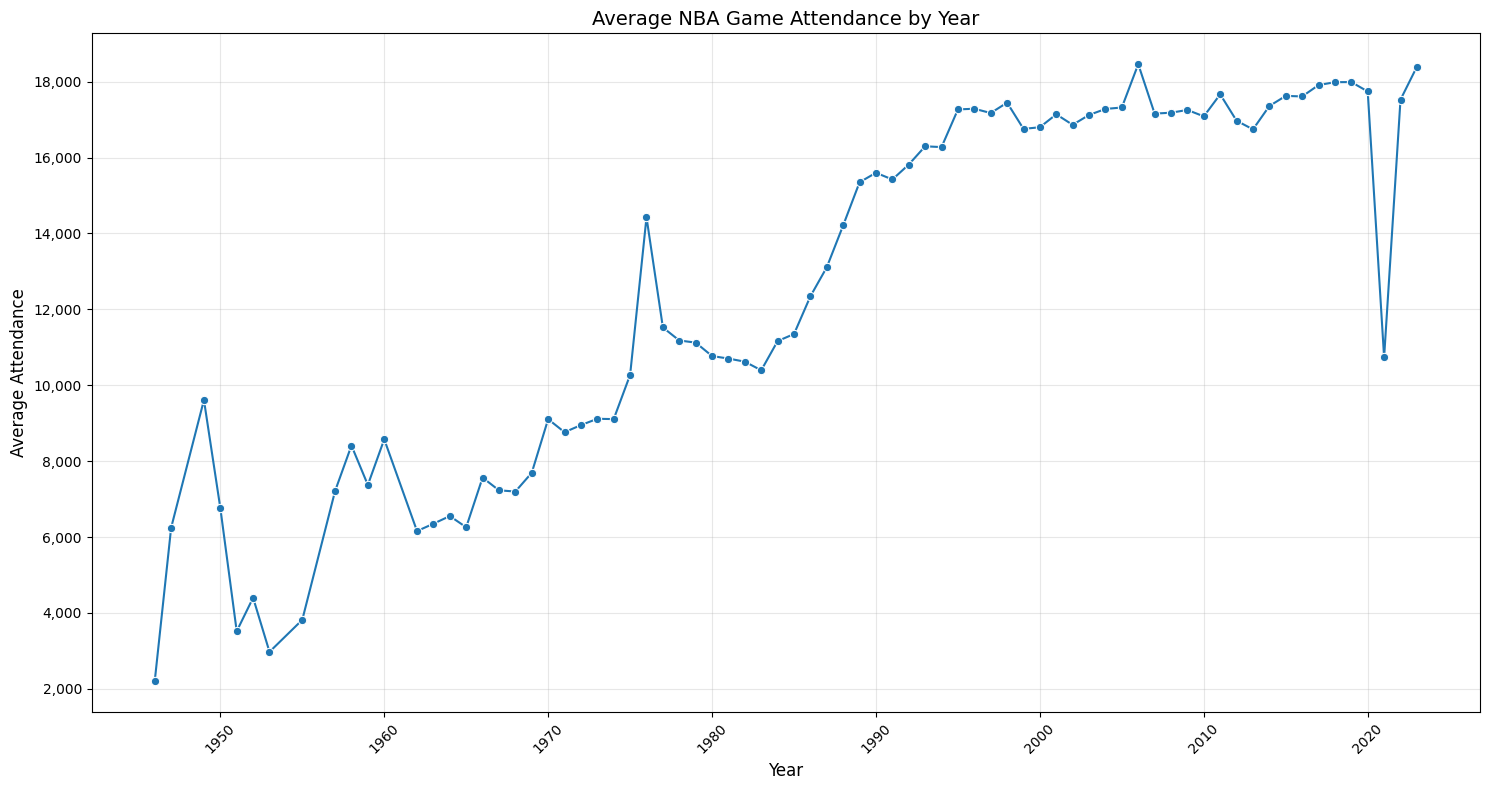


Yearly Attendance Statistics:
              year    attendance
count    78.000000     74.000000
mean   1984.500000  12527.095734
std      22.660538   4800.500681
min    1946.000000   2206.000000
25%    1965.250000   8622.179030
50%    1984.500000  12727.977209
75%    2003.750000  17170.980947
max    2023.000000  18462.522222


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('PublicData/game_info.csv')

# Convert game_date to datetime
df['game_date'] = pd.to_datetime(df['game_date'])

# Extract year from game_date
df['year'] = df['game_date'].dt.year

# Calculate average attendance per year
yearly_attendance = df.groupby('year')['attendance'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_attendance, x='year', y='attendance', marker='o')

# Customize the plot
plt.title('Average NBA Game Attendance by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add thousands separator to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()
print("\nYearly Attendance Statistics:")
print(yearly_attendance.describe())

In [85]:
df = pd.read_csv('Master_Short_Data.csv')

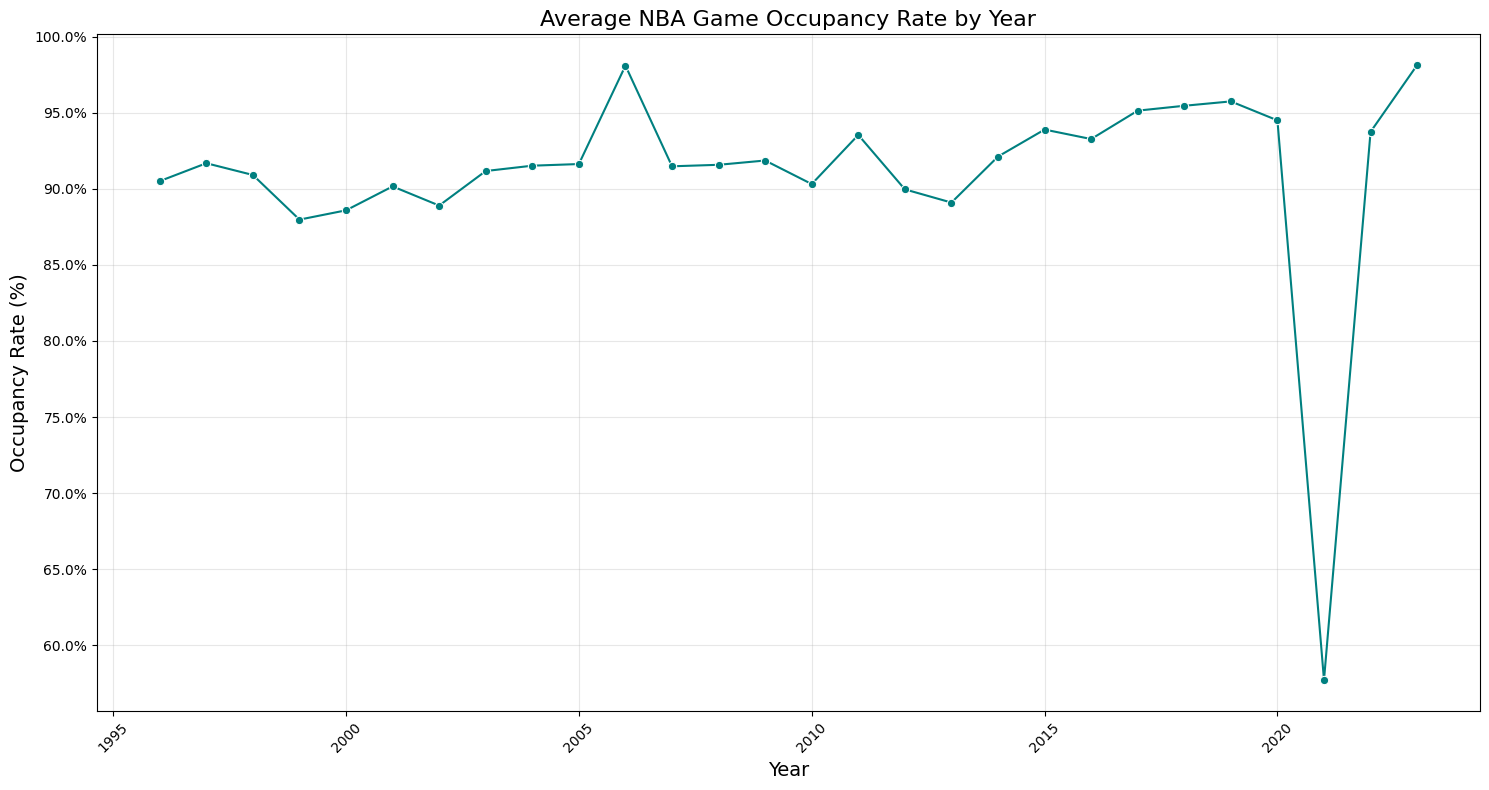


Yearly Occupancy Rate Statistics:
              year  occupancy_rate
count    28.000000       28.000000
mean   2009.500000       91.032999
std       8.225975        7.043547
min    1996.000000       57.699836
25%    2002.750000       90.281499
50%    2009.500000       91.612429
75%    2016.250000       93.792031
max    2023.000000       98.145894


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

# Ensure correct datetime and numeric types
df['game_date'] = pd.to_datetime(df['game_date'], errors='coerce')
df['occupancy_rate'] = pd.to_numeric(df['occupancy_rate'], errors='coerce')

# # Remove rows with missing or zero occupancy_rate
# df = df[df['occupancy_rate'].notnull() & (df['occupancy_rate'] > 0)]

# Extract year from game_date
df['year'] = df['game_date'].dt.year

# Calculate average occupancy per year
yearly_occupancy = df.groupby('year')['occupancy_rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_occupancy, x='year', y='occupancy_rate', marker='o', color='teal')

# Customize plot
plt.title('Average NBA Game Occupancy Rate by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Occupancy Rate (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.tight_layout()
plt.show()

# Print summary
print("\nYearly Occupancy Rate Statistics:")
print(yearly_occupancy.describe())


### Stadium Capacities

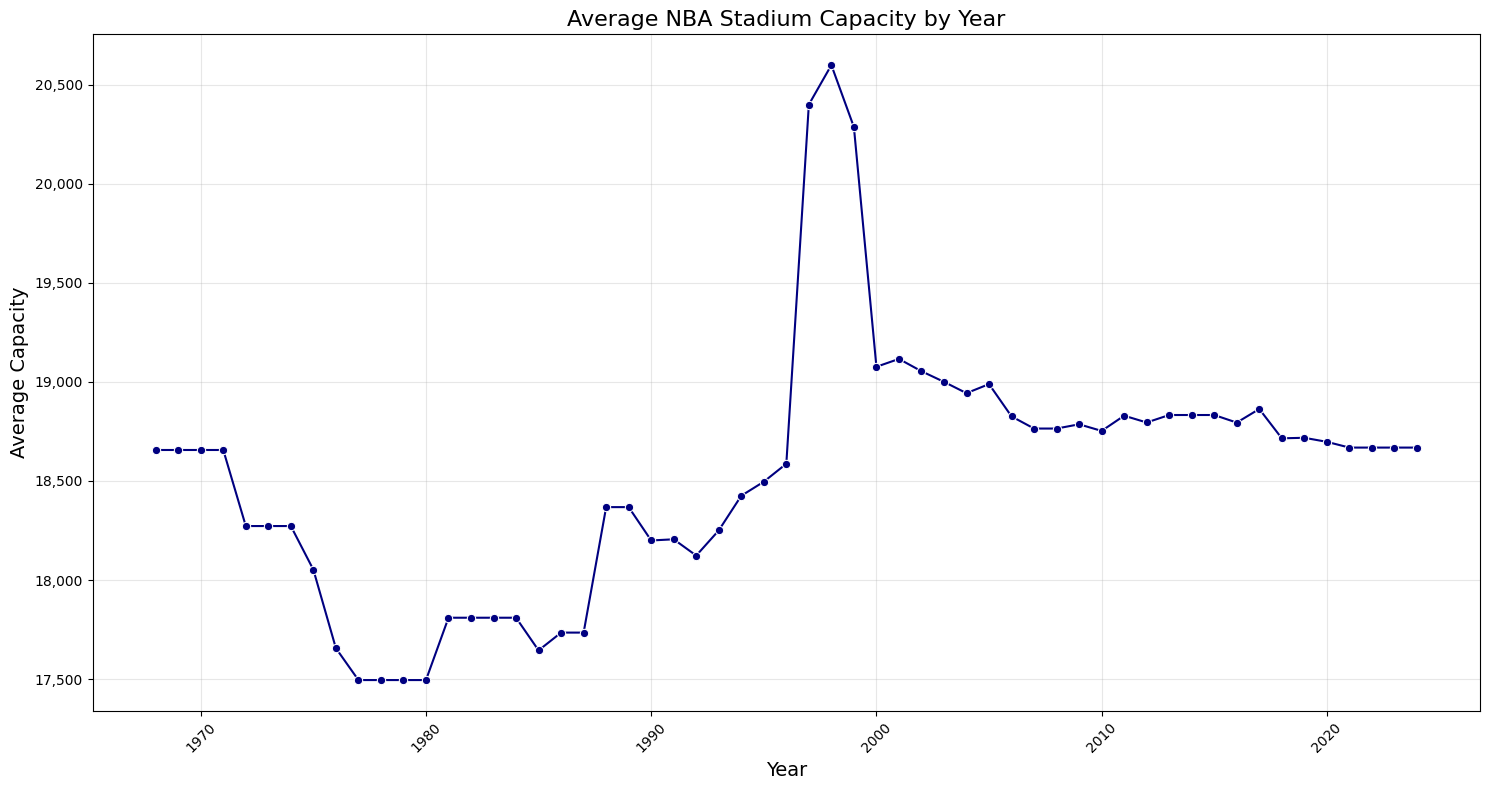

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load stadium capacity data
df = pd.read_csv('CreatedData/stadion_capacity.csv')

# Expand each row for every year the stadium was in use
rows = []
for _, row in df.iterrows():
    for year in range(row['start_year'], row['end_year'] + 1):
        rows.append({
            'team_id': row['team_id'],
            'abbreviation': row['abbreviation'],
            'stadion_name': row['stadion_name'],
            'capacity': row['capacity'],
            'year': year
        })

expanded_df = pd.DataFrame(rows)

# Calculate average stadium capacity per year
avg_capacity_per_year = expanded_df.groupby('year')['capacity'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_capacity_per_year, x='year', y='capacity', marker='o', color='navy')

# Customize plot
plt.title('Average NBA Stadium Capacity by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Capacity', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


### Covid Analysis

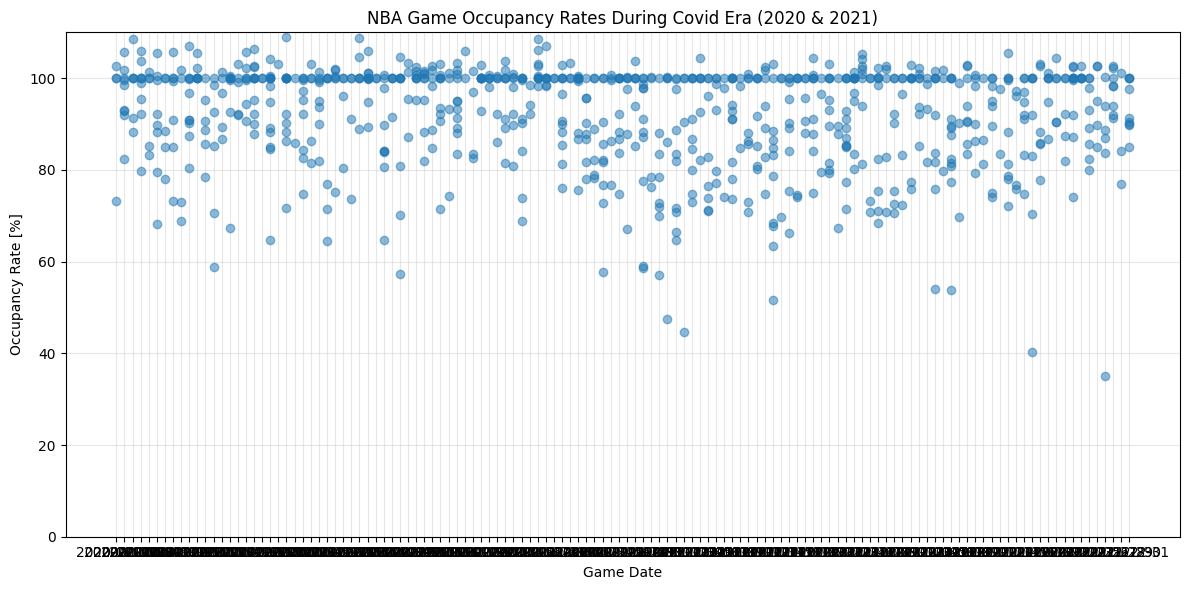

In [64]:
import matplotlib.pyplot as plt

df = pd.read_csv('Master_Short_Data.csv')

# Filter for 2020 and 2021
covid_era = df[df['game_year'].isin([2020, 2021])]

# drop all rows between 2020 march and 2021 september
covid_era = covid_era[(covid_era['game_date'] < '2020-03-01') | (covid_era['game_date'] > '2021-10-15')]

plt.figure(figsize=(12, 6))
plt.plot(covid_era['game_date'], covid_era['occupancy_rate'], marker='o', linestyle='', alpha=0.5)
plt.title('NBA Game Occupancy Rates During Covid Era (2020 & 2021)')
plt.xlabel('Game Date')
plt.ylabel('Occupancy Rate [%]')
plt.ylim(0, 110)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

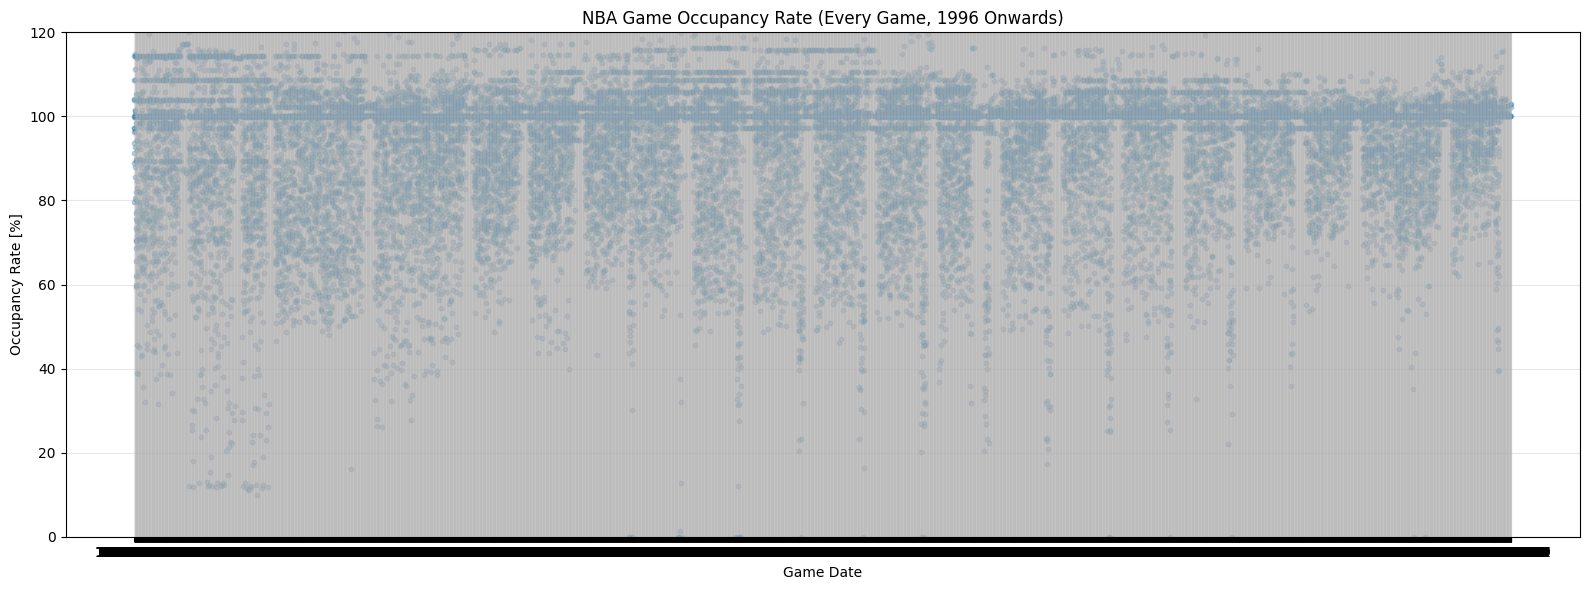

In [65]:
import matplotlib.pyplot as plt

df = pd.read_csv('Master_Short_Data.csv')

# Filter for games from 1996 onwards
games_1996_onwards = df[df['game_year'] >= 1996]

plt.figure(figsize=(16, 6))
plt.scatter(games_1996_onwards['game_date'], games_1996_onwards['occupancy_rate'], alpha=0.3, s=10)
plt.title('NBA Game Occupancy Rate (Every Game, 1996 Onwards)')
plt.xlabel('Game Date')
plt.ylabel('Occupancy Rate [%]')
plt.ylim(0, 120)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

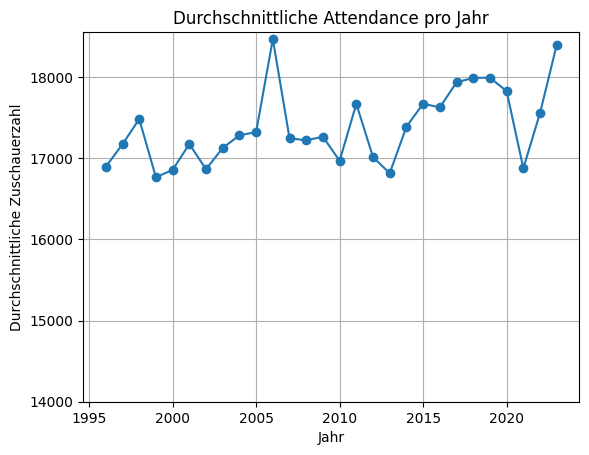

In [66]:
import matplotlib.pyplot as plt

df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year
df.groupby('year')['attendance'].mean().plot(marker='o')
plt.title("Durchschnittliche Attendance pro Jahr")
plt.ylabel("Durchschnittliche Zuschauerzahl")
plt.xlabel("Jahr")
plt.ylim(bottom=14000)  # Y-Achse beginnt bei 0
plt.grid(True)
plt.show()


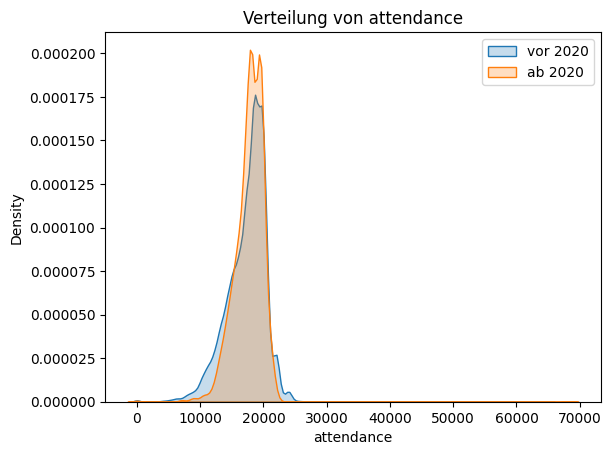

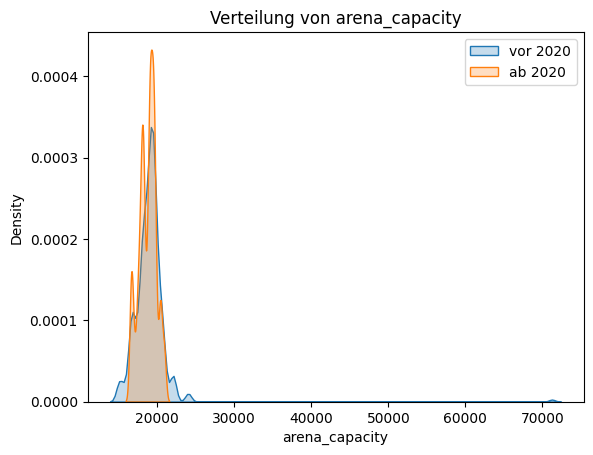

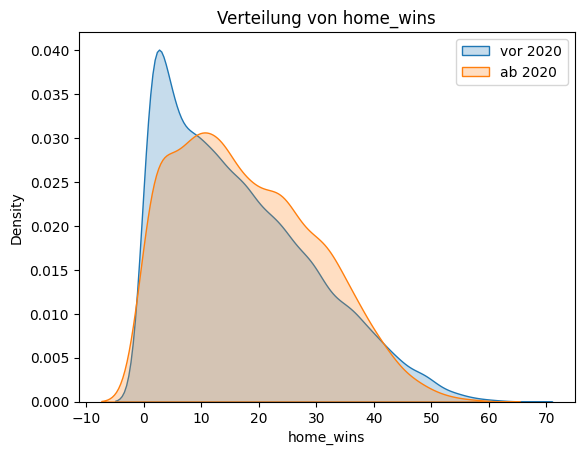

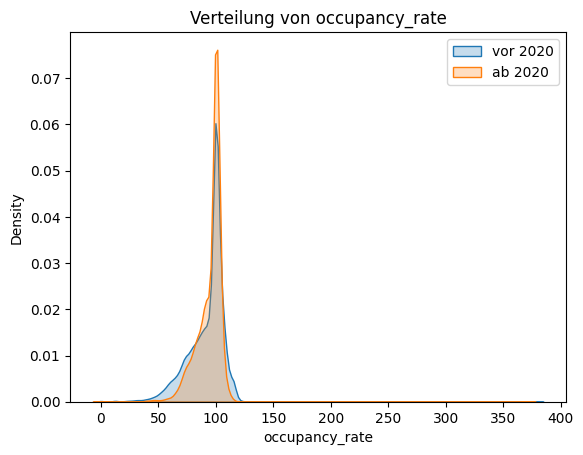

In [67]:
df = pd.read_csv('Master_Short_Data.csv')

pre_2020 = df[df['game_date'] < "2020-01-01"]
post_2020 = df[df['game_date'] >= "2020-01-01"]

for feature in ['attendance', 'arena_capacity', 'home_wins', 'occupancy_rate']:
    sns.kdeplot(pre_2020[feature], label='vor 2020', fill=True)
    sns.kdeplot(post_2020[feature], label='ab 2020', fill=True)
    plt.title(f"Verteilung von {feature}")
    plt.legend()
    plt.show()

### Attendance, Capacity & Occupancy for each team over the years

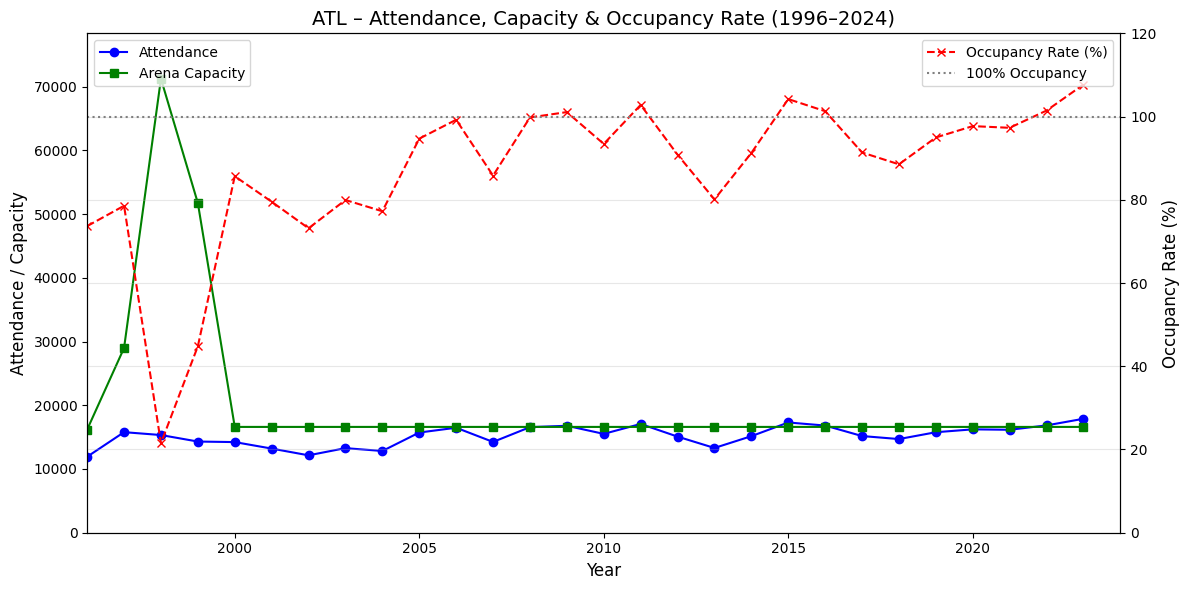

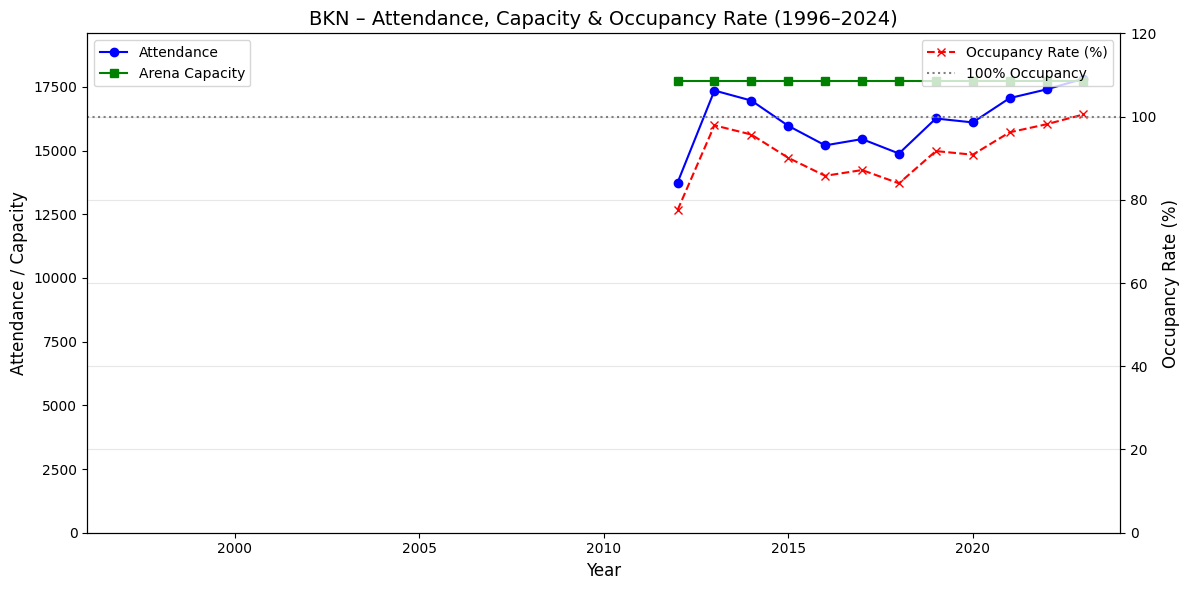

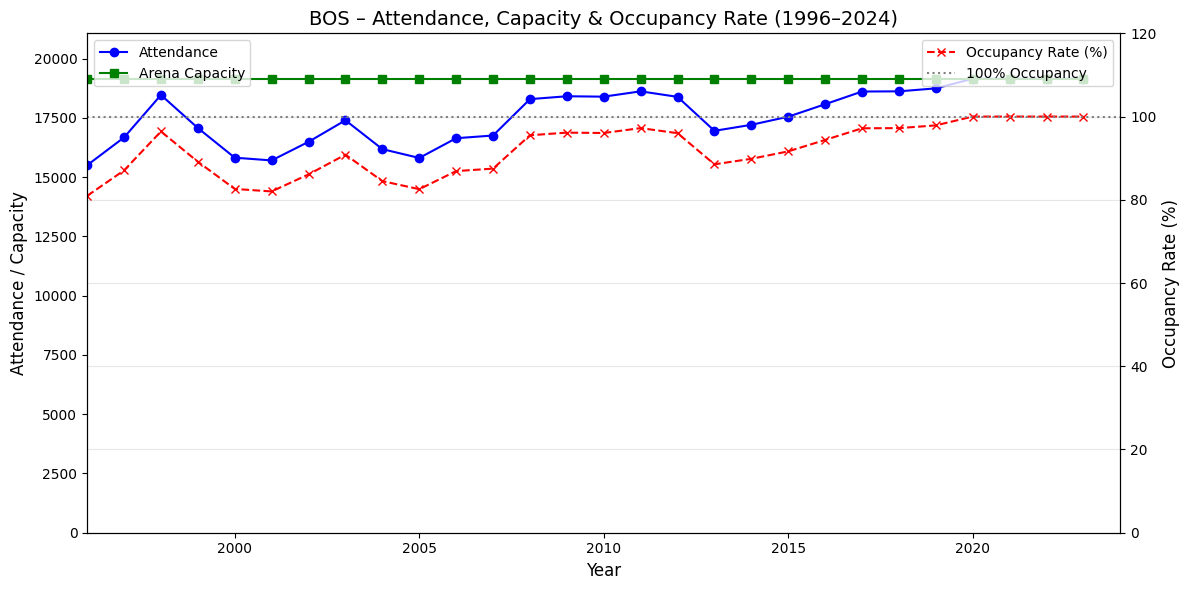

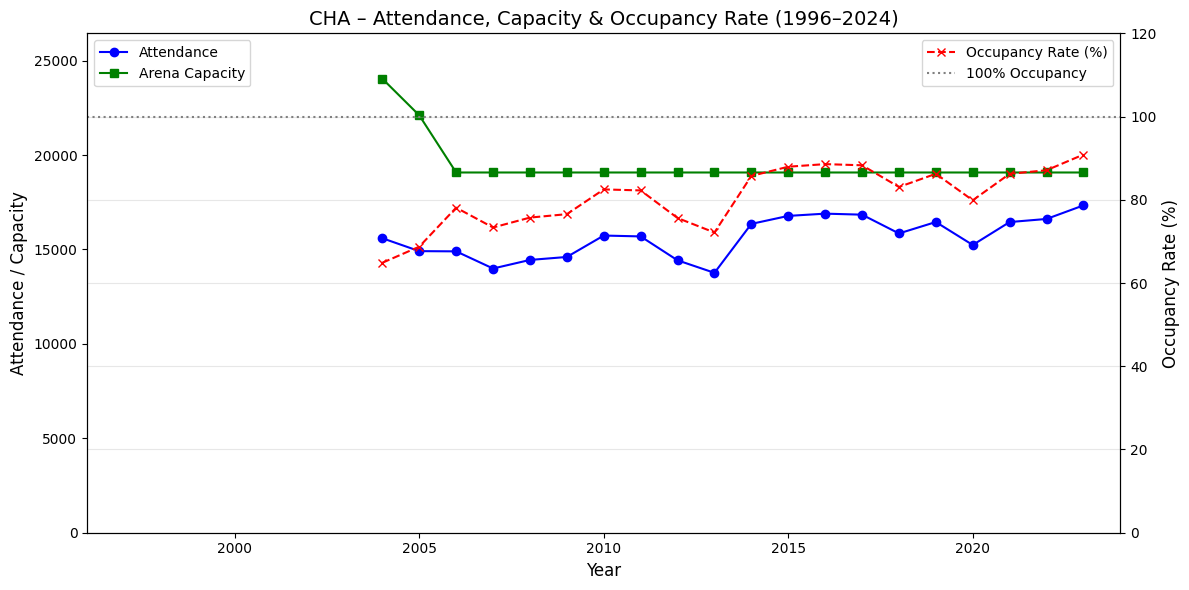

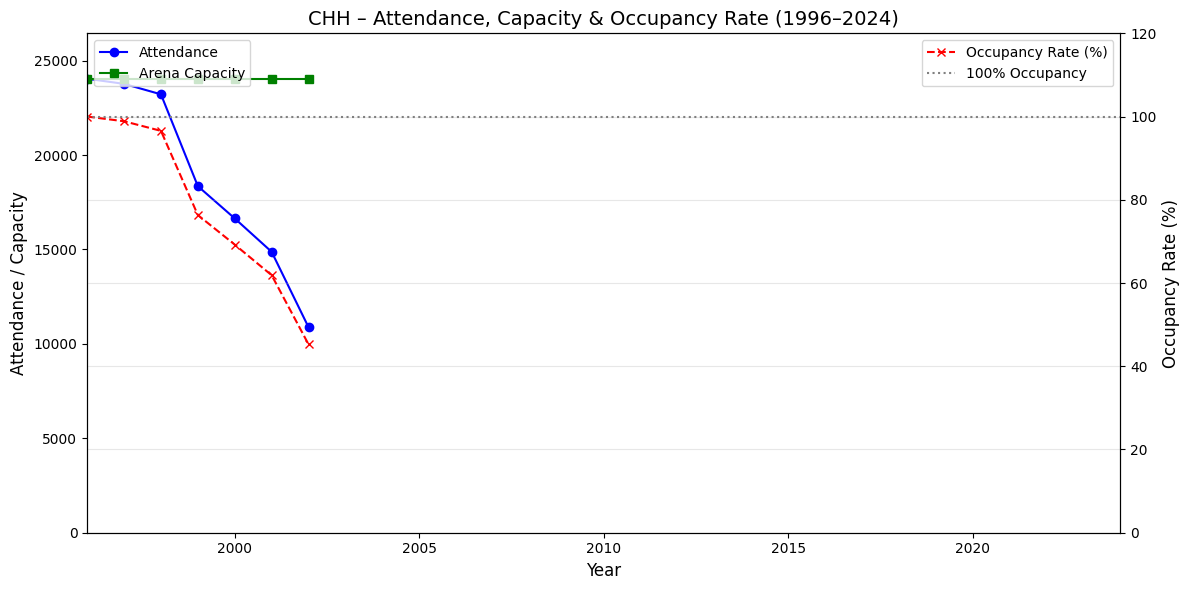

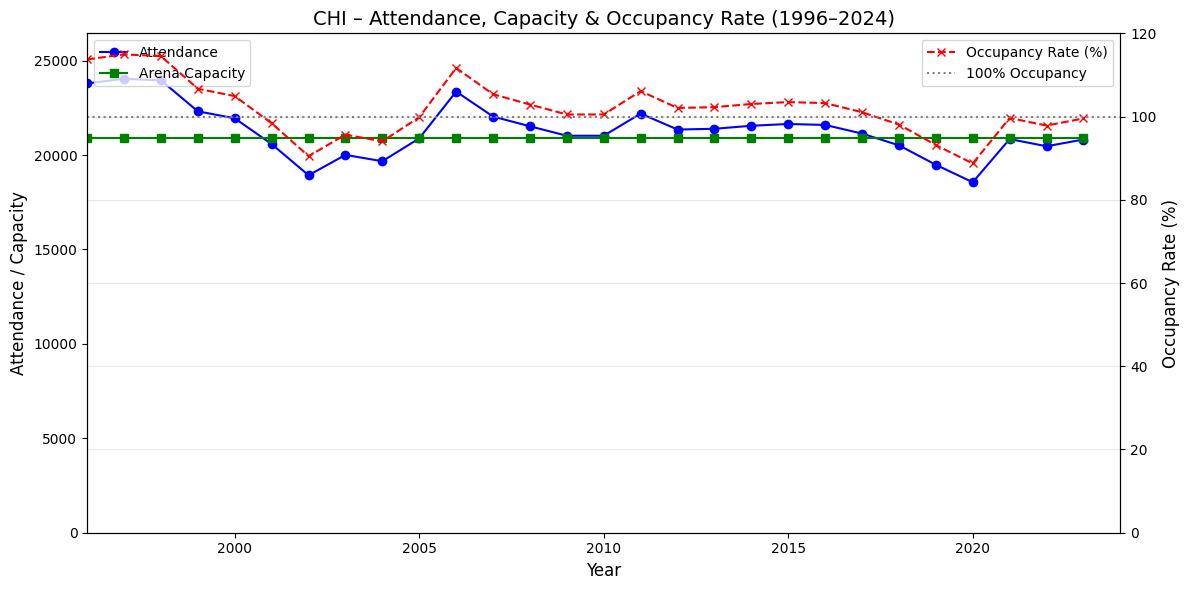

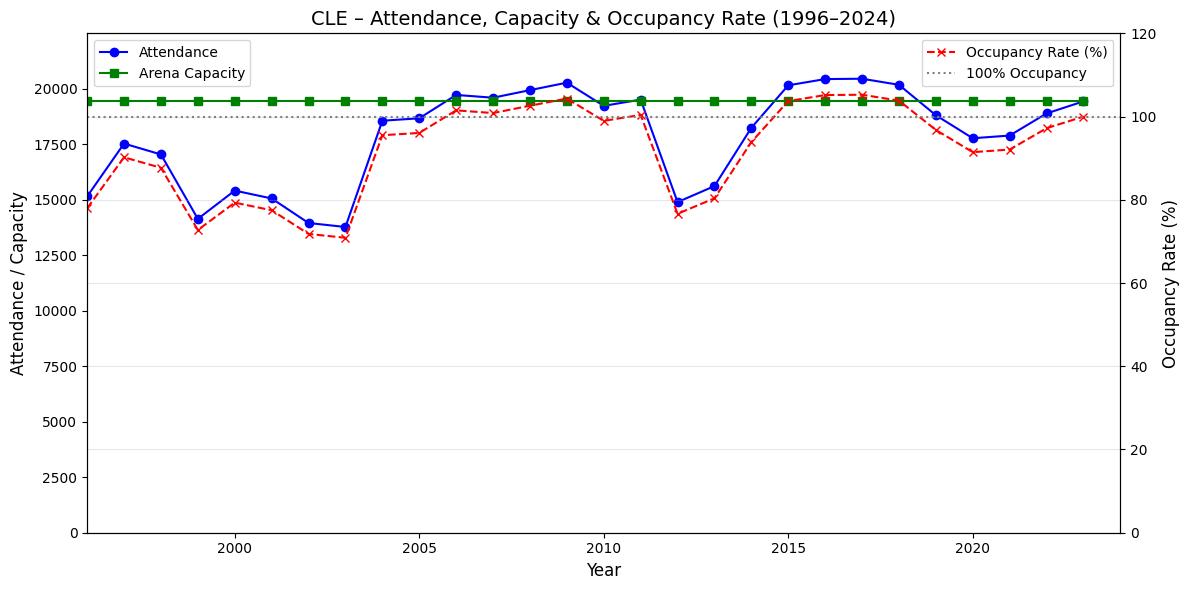

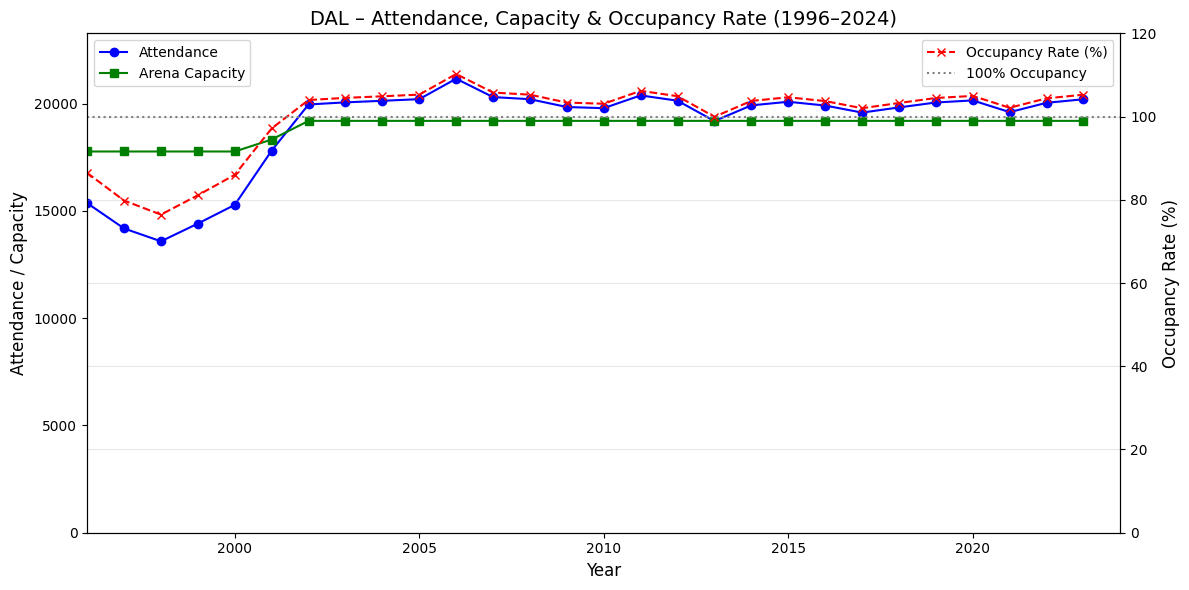

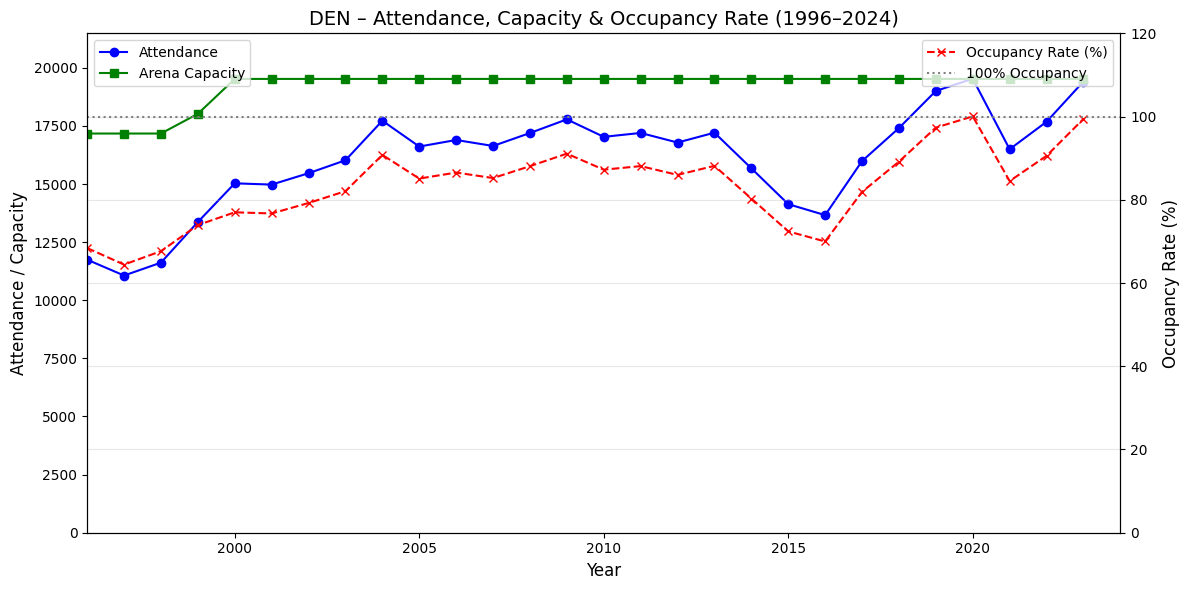

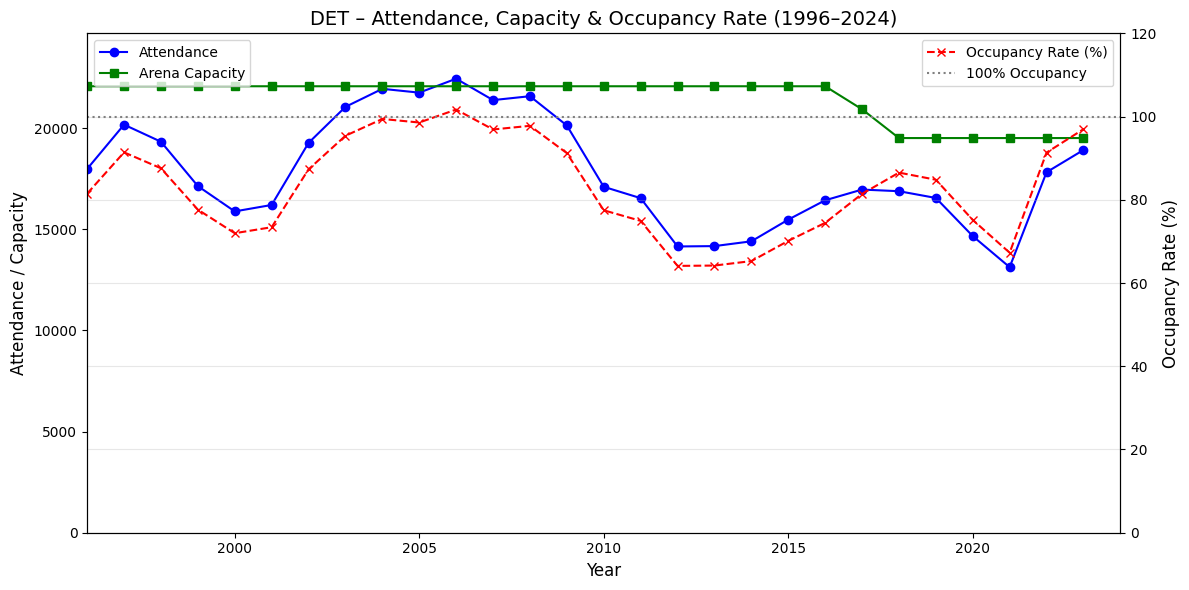

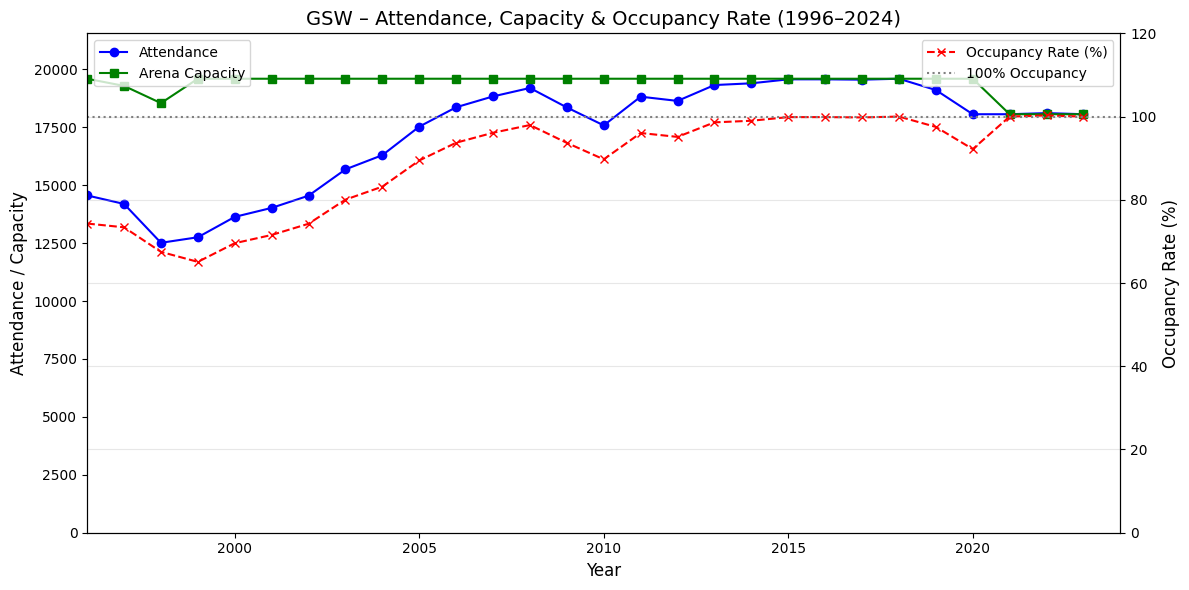

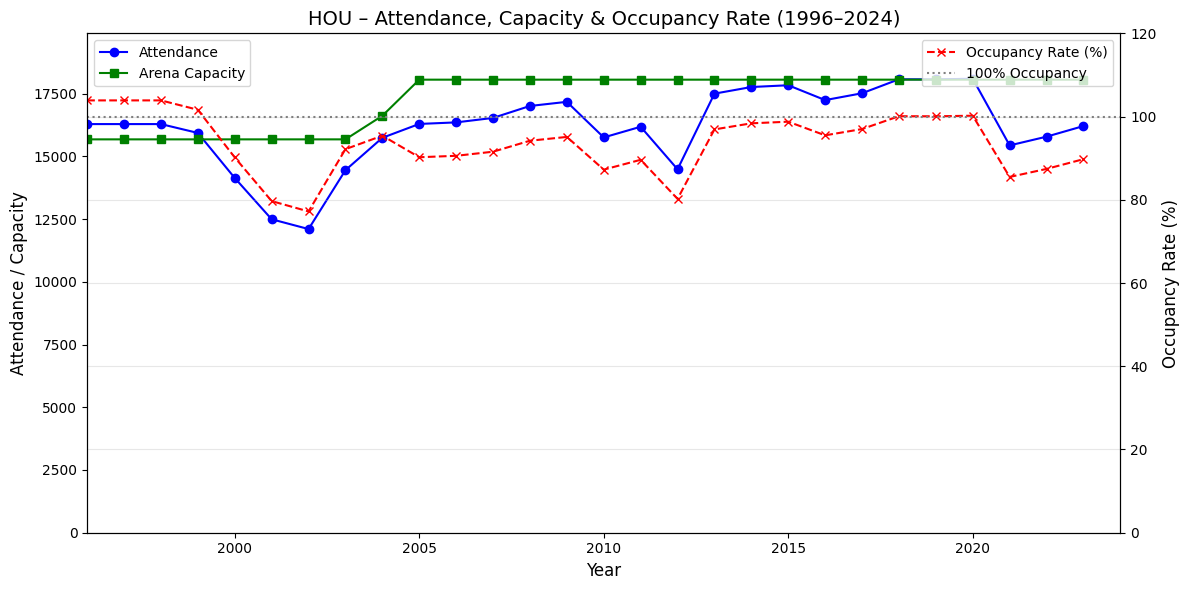

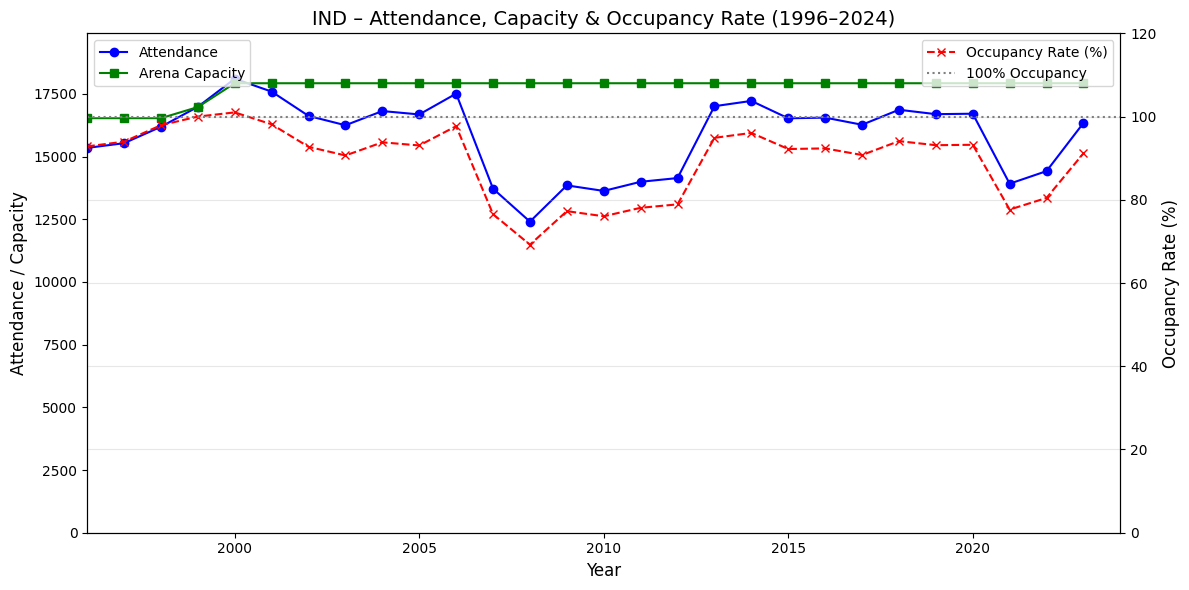

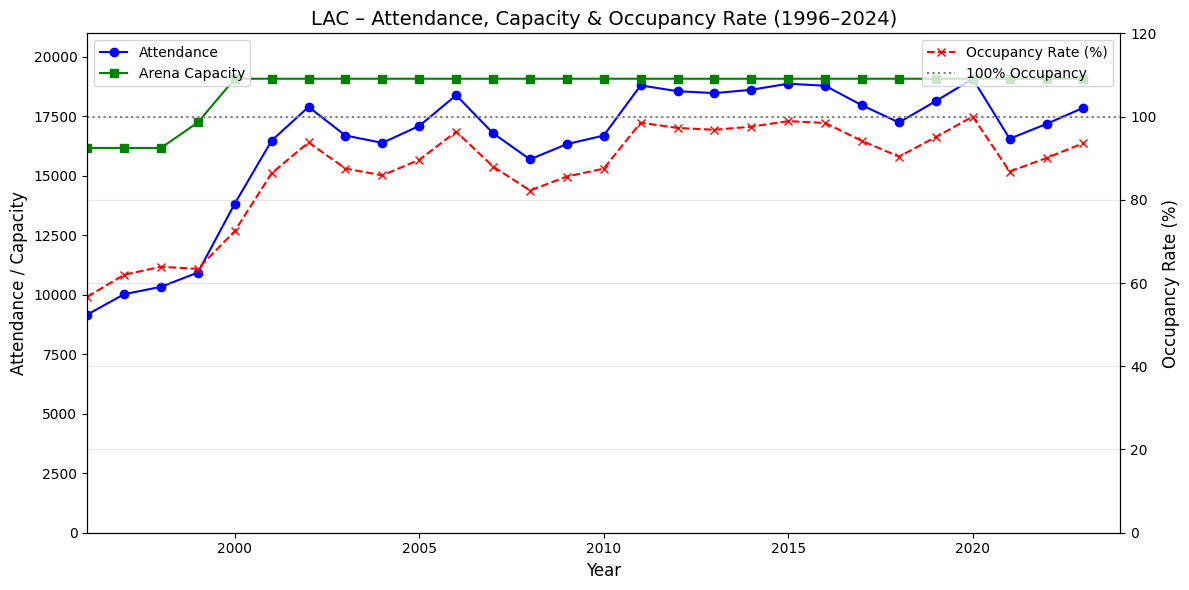

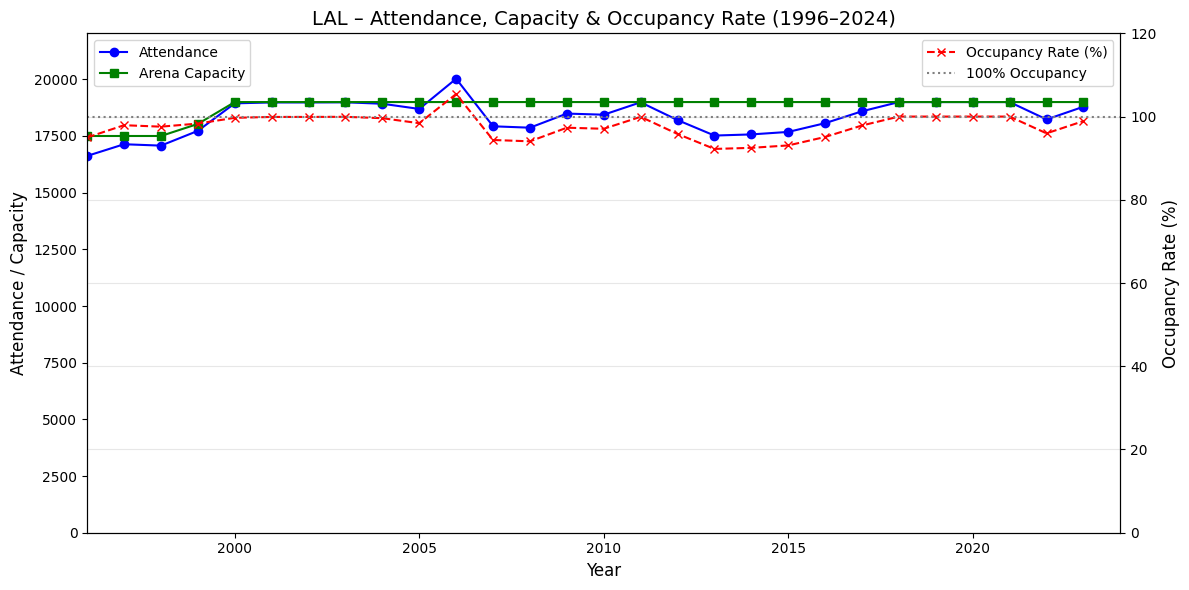

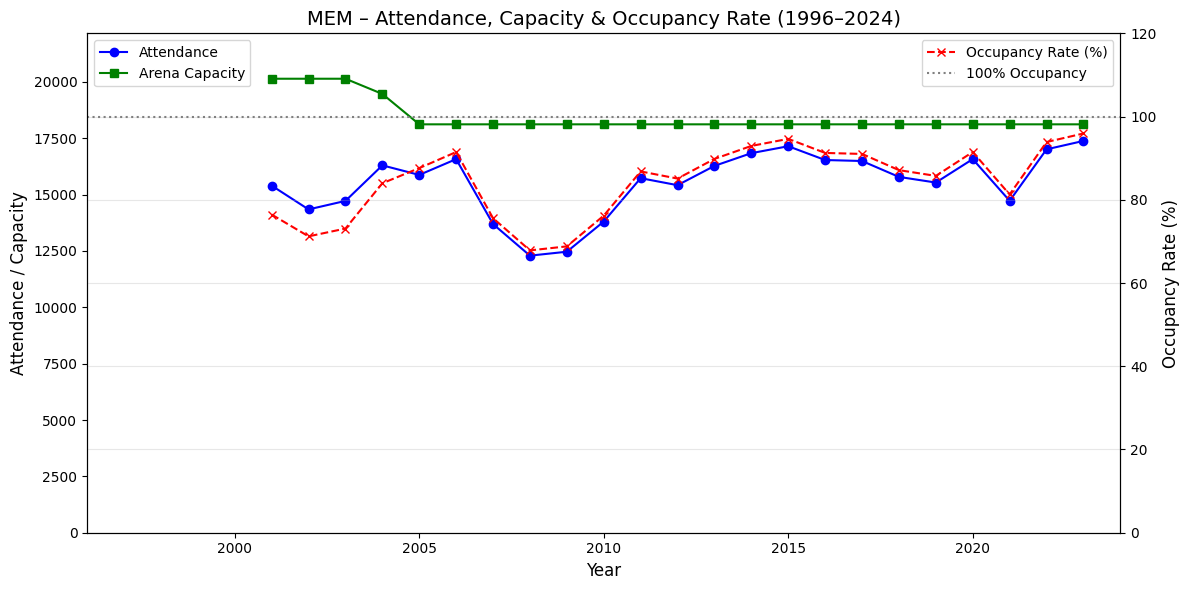

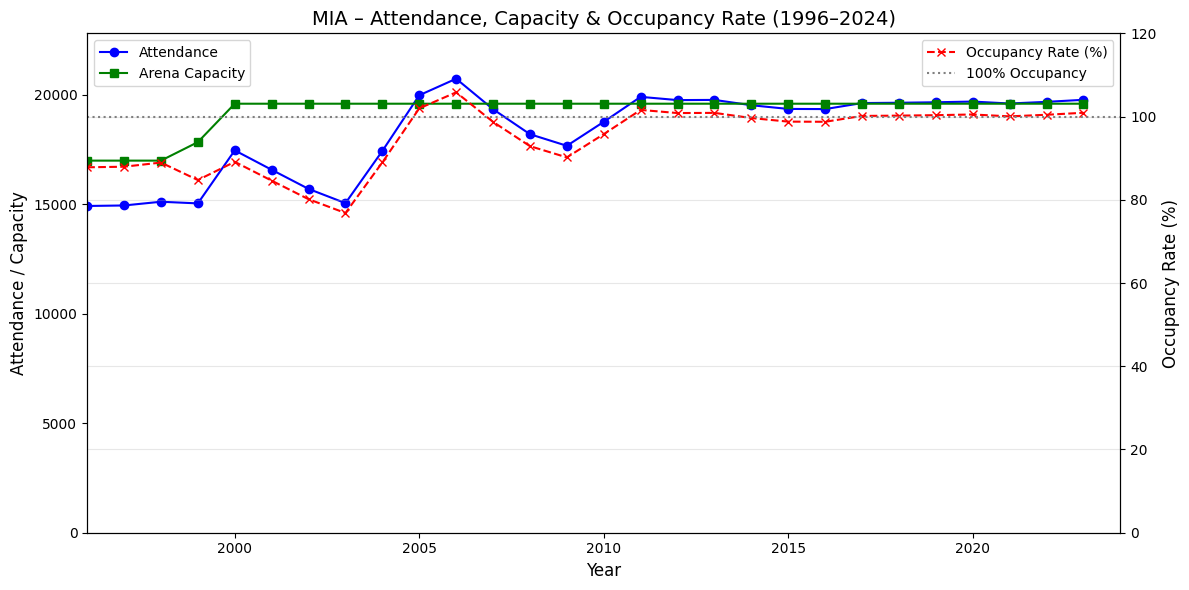

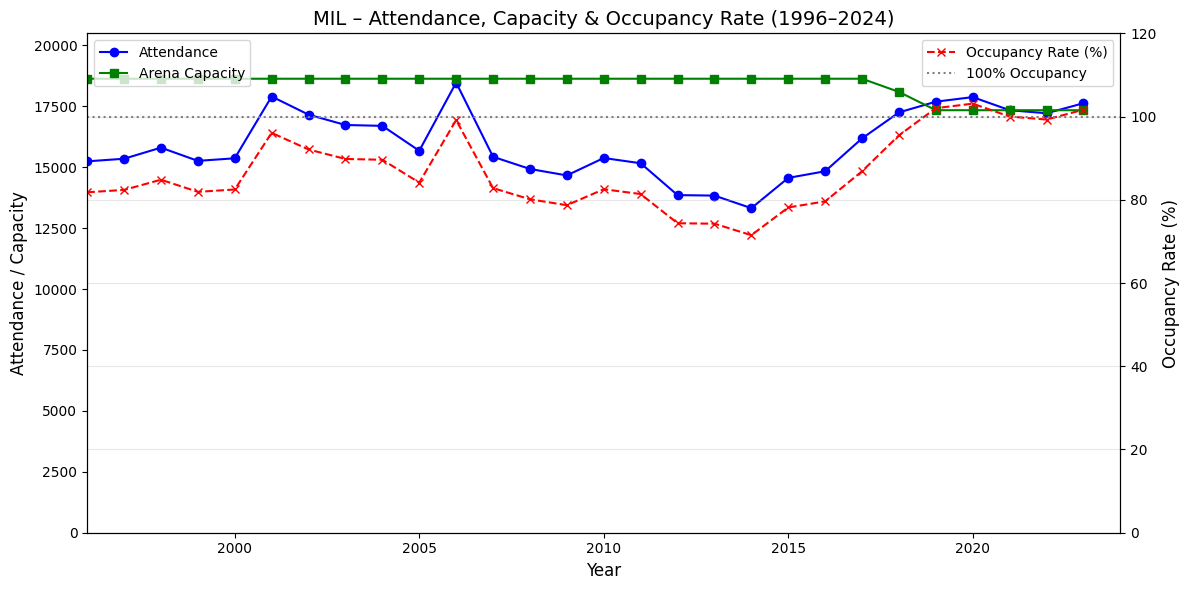

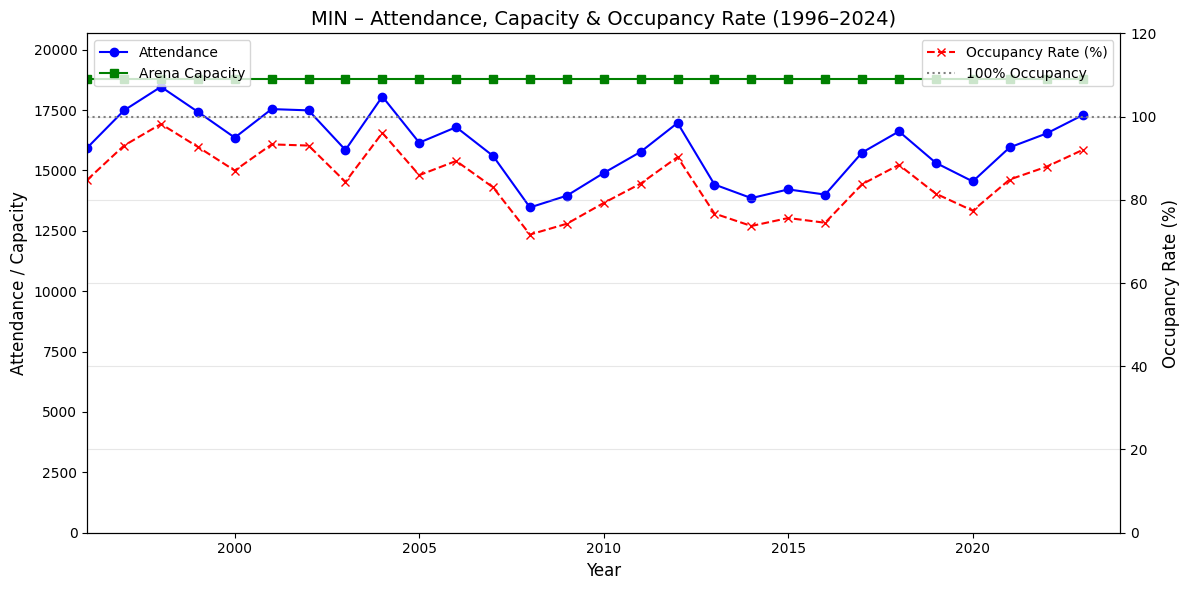

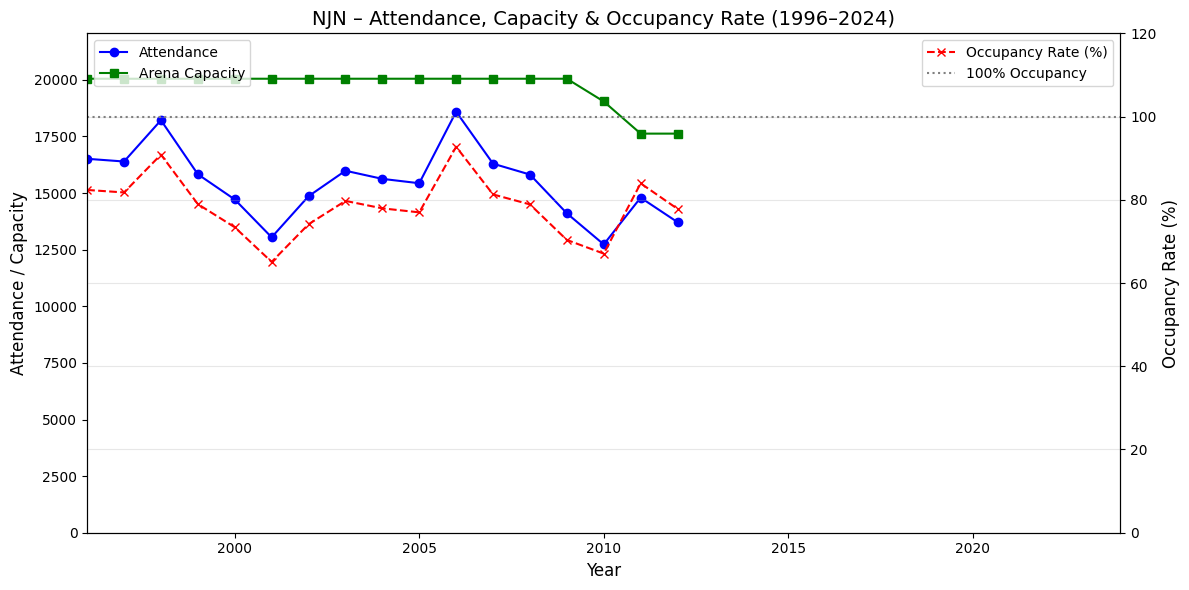

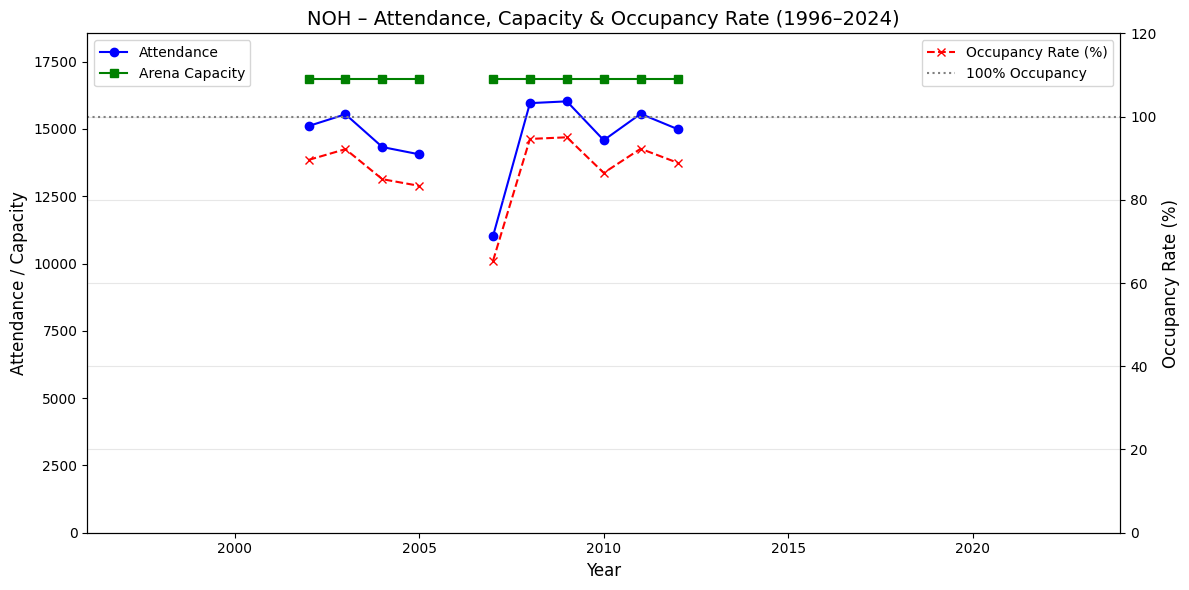

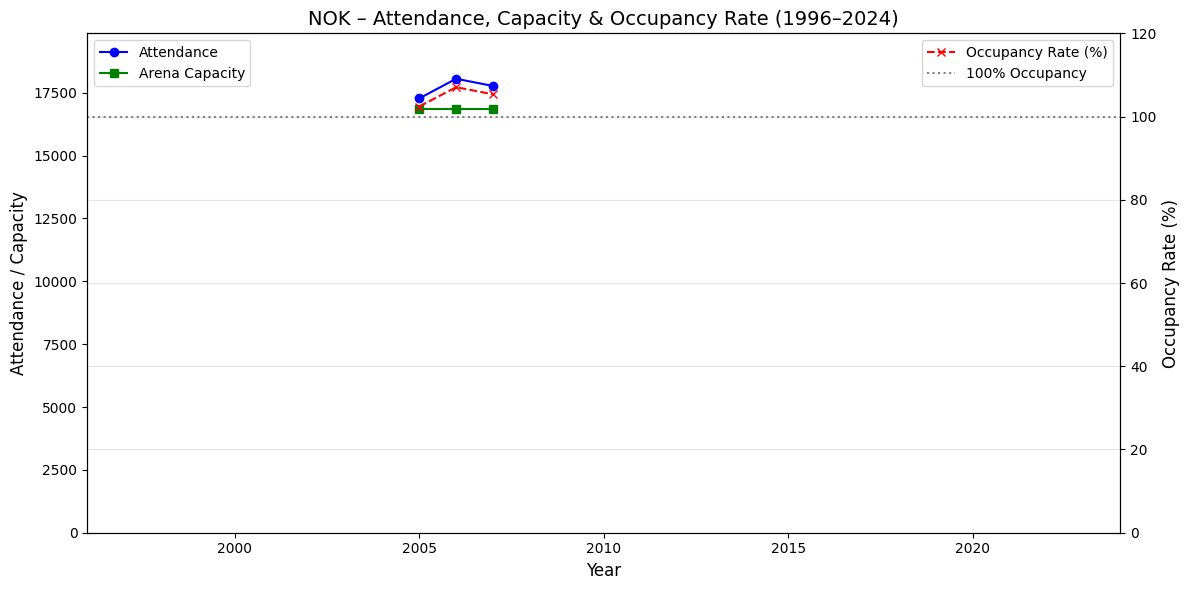

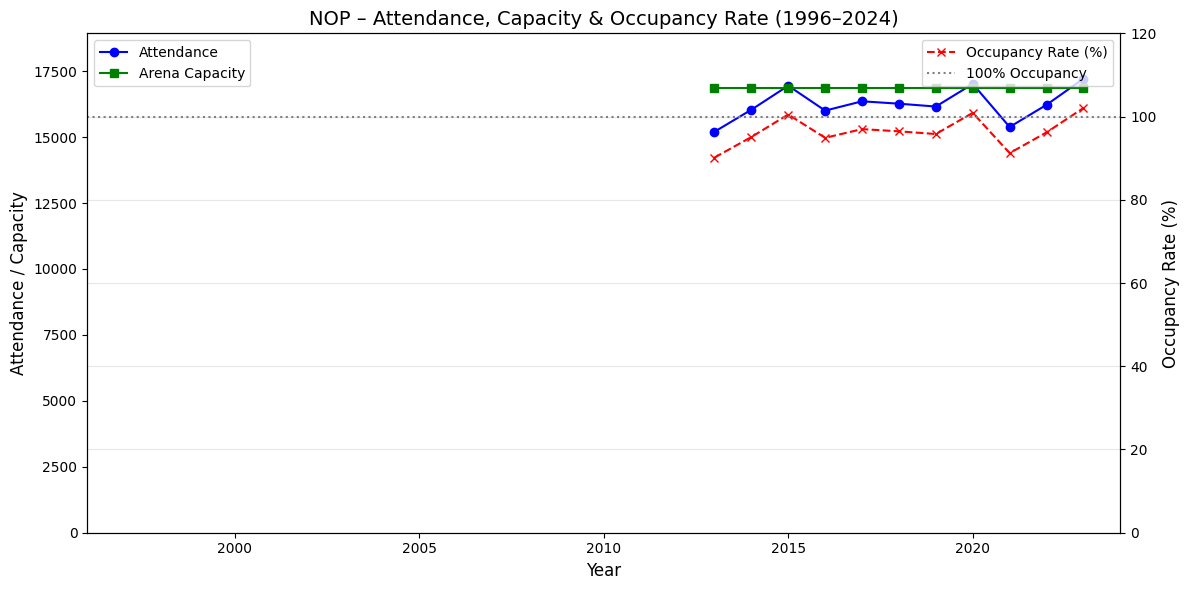

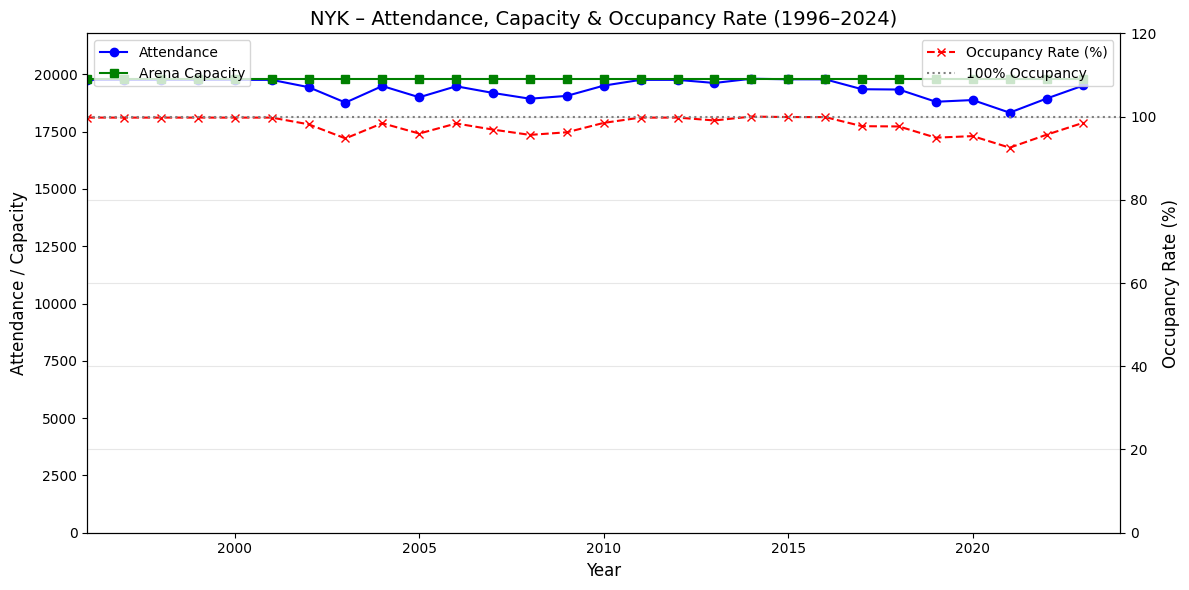

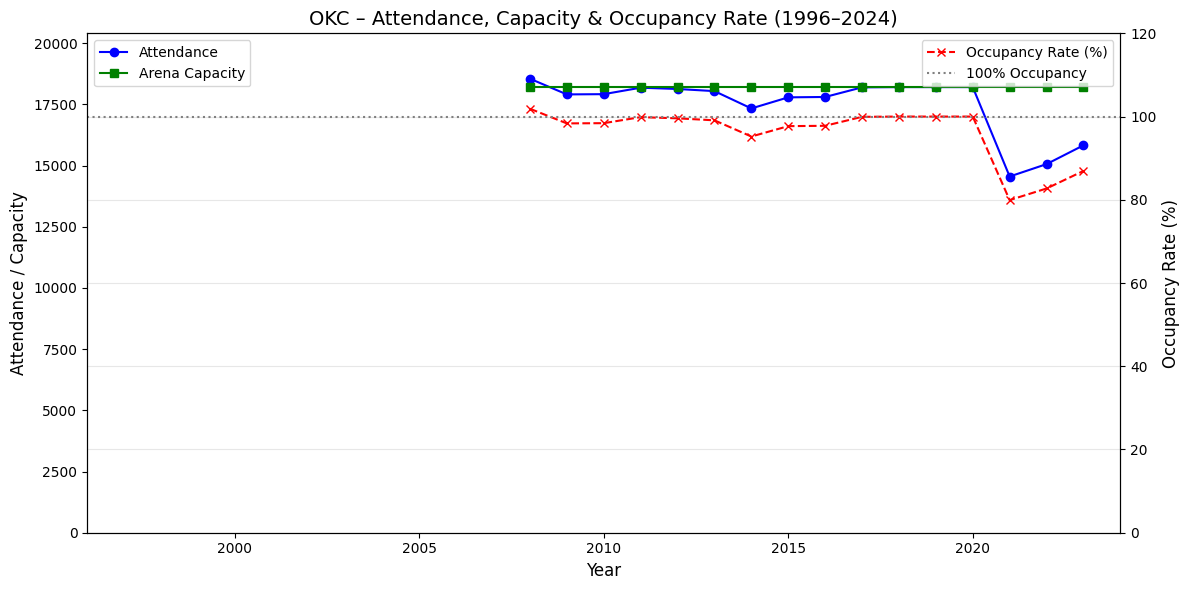

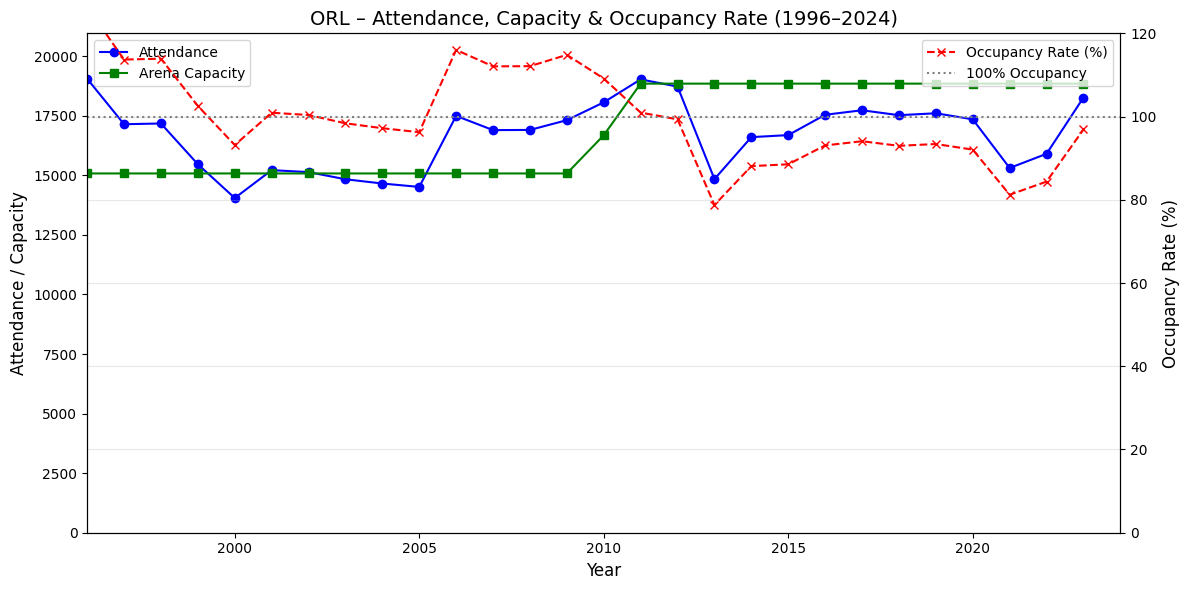

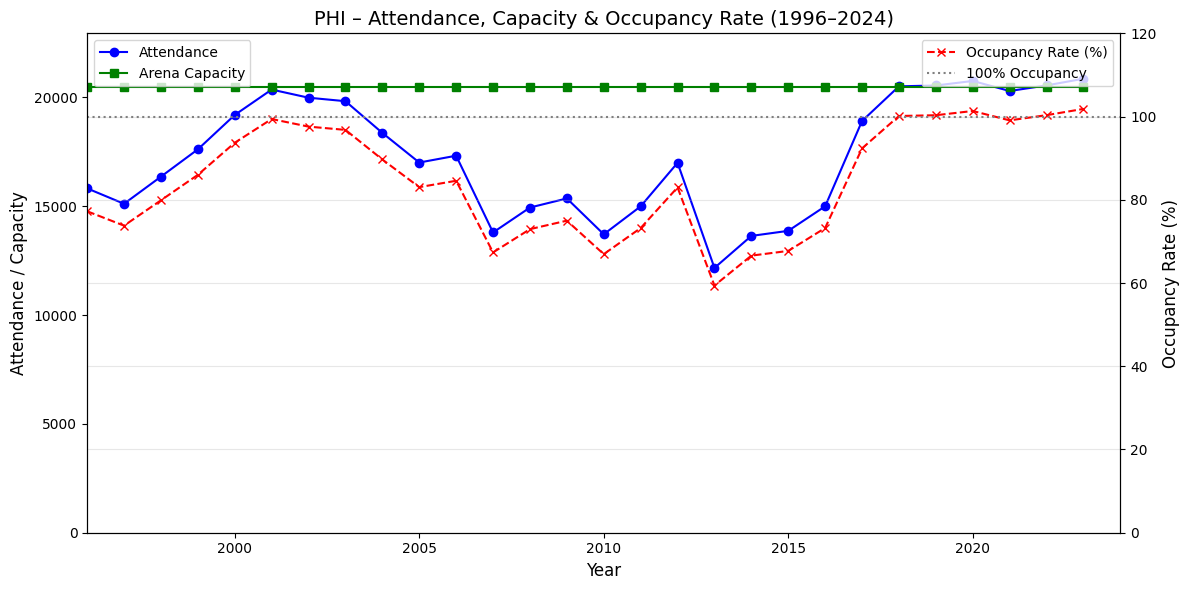

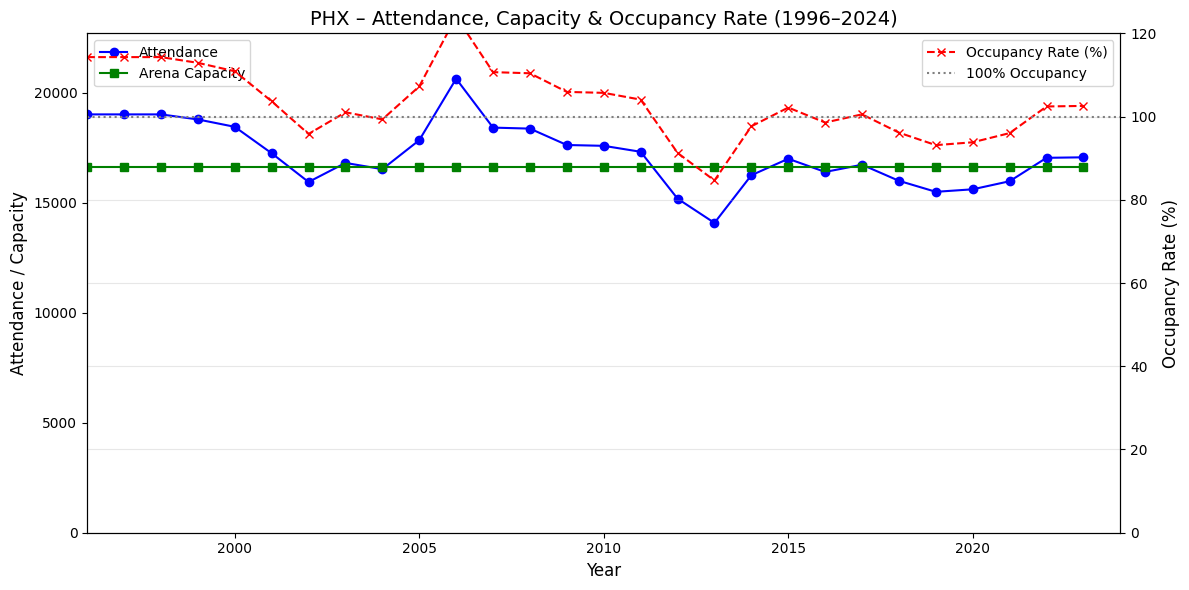

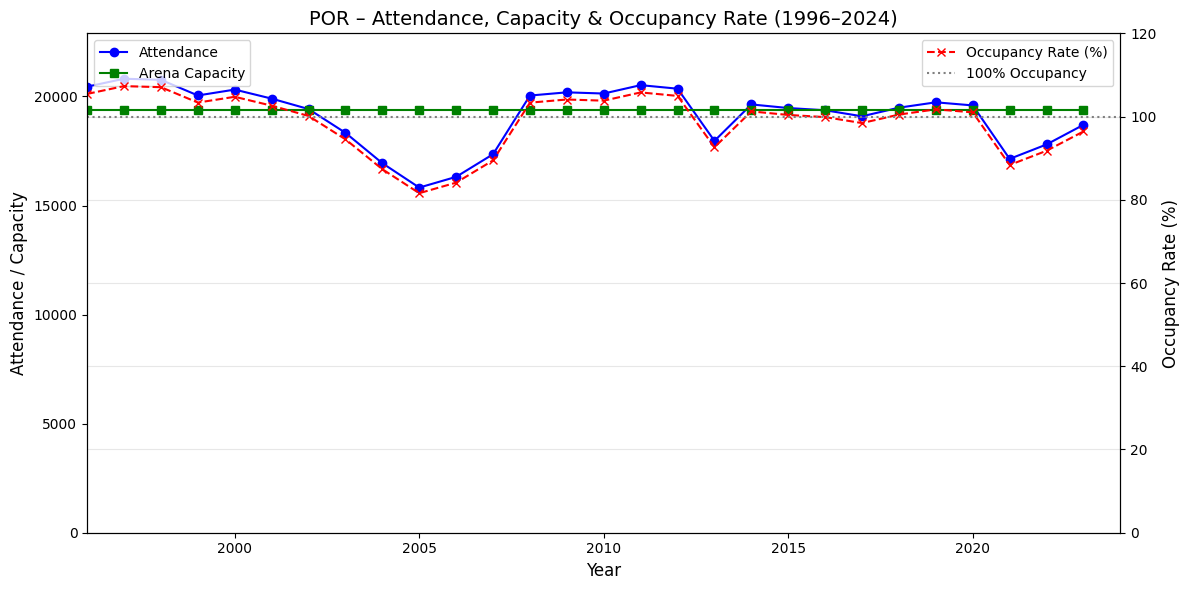

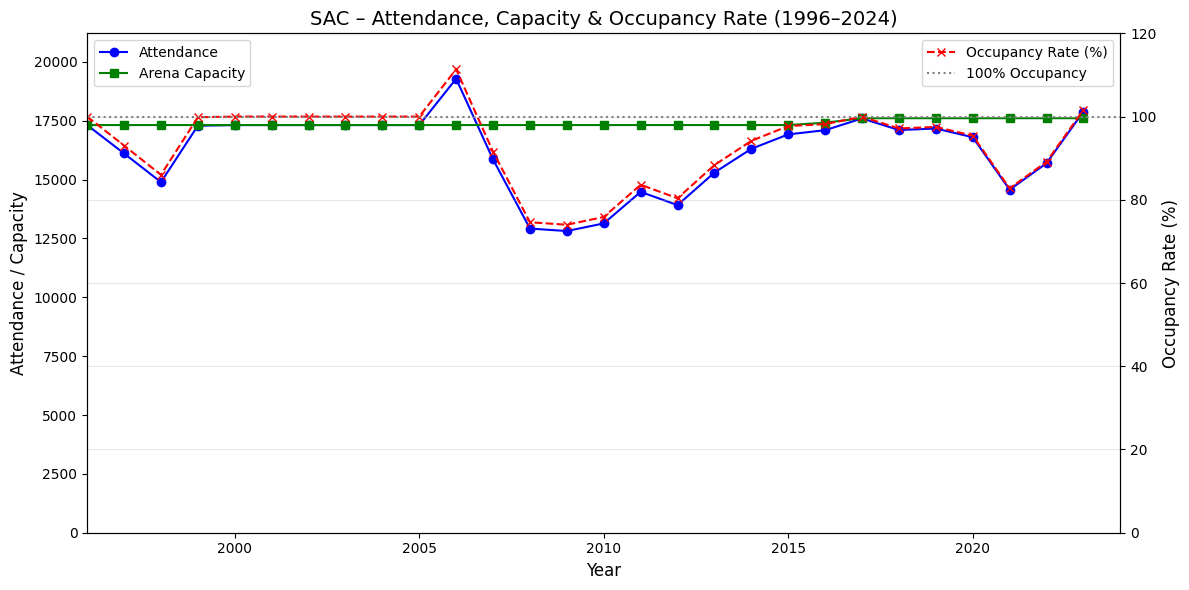

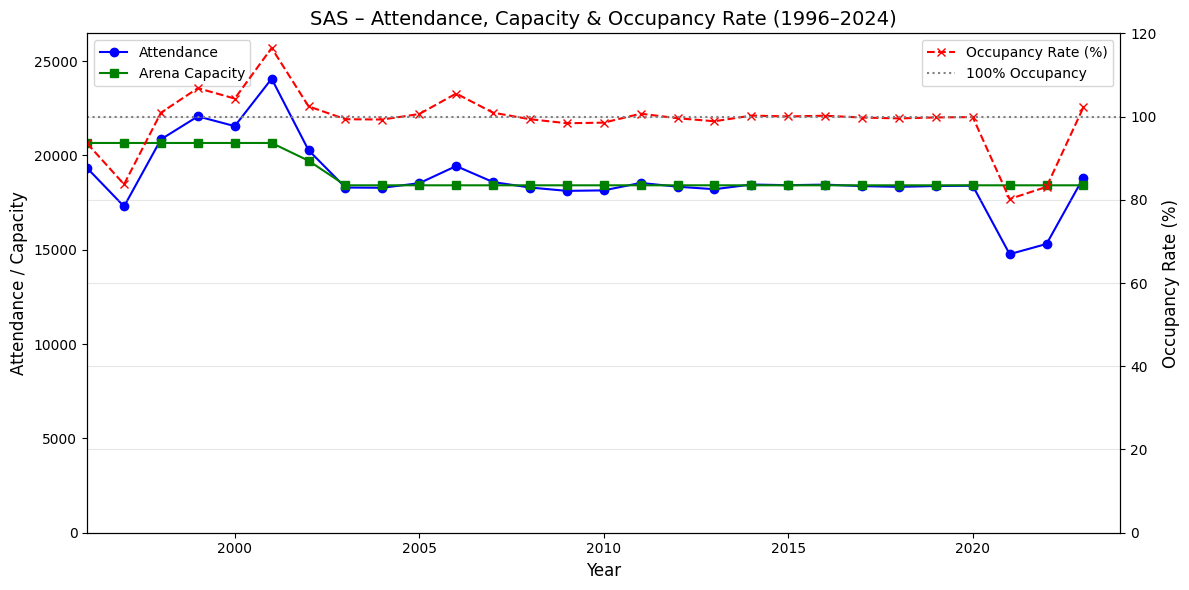

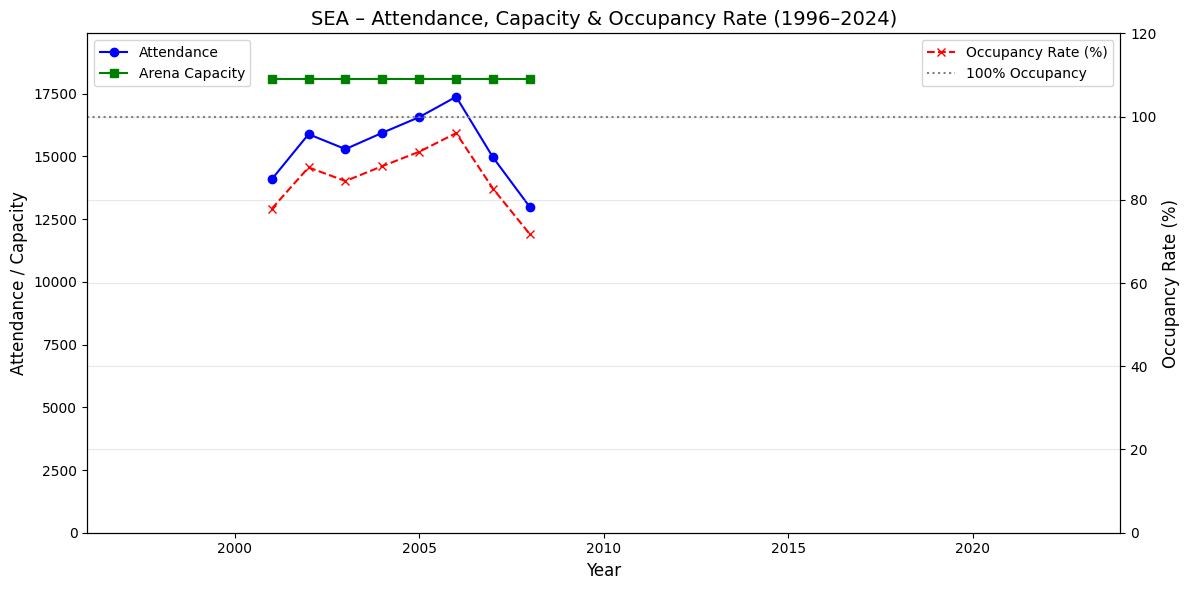

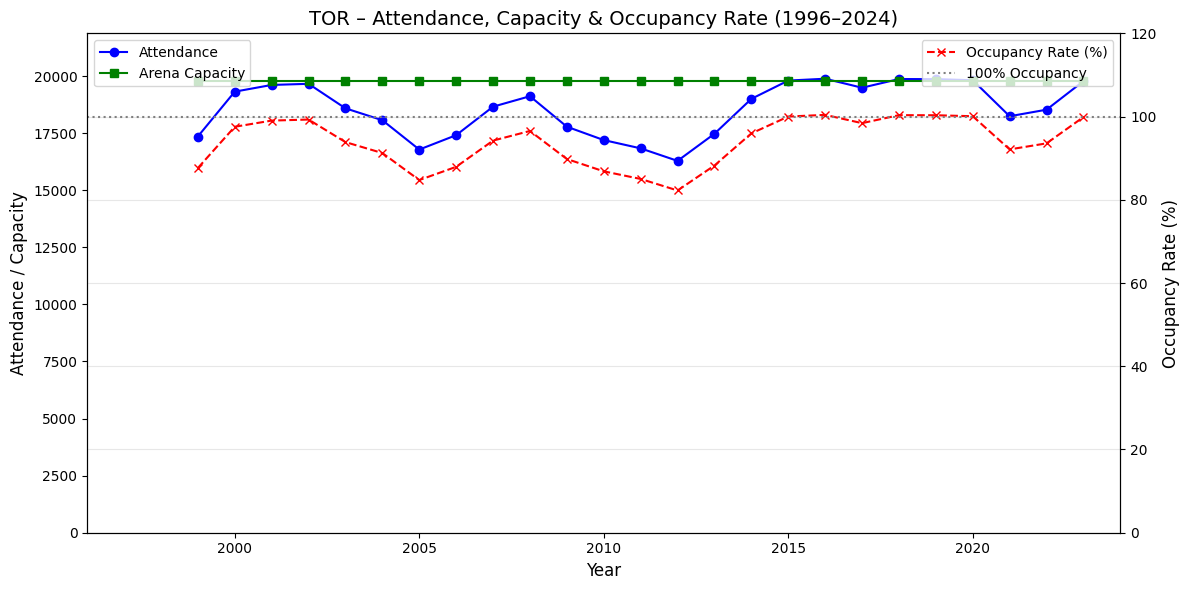

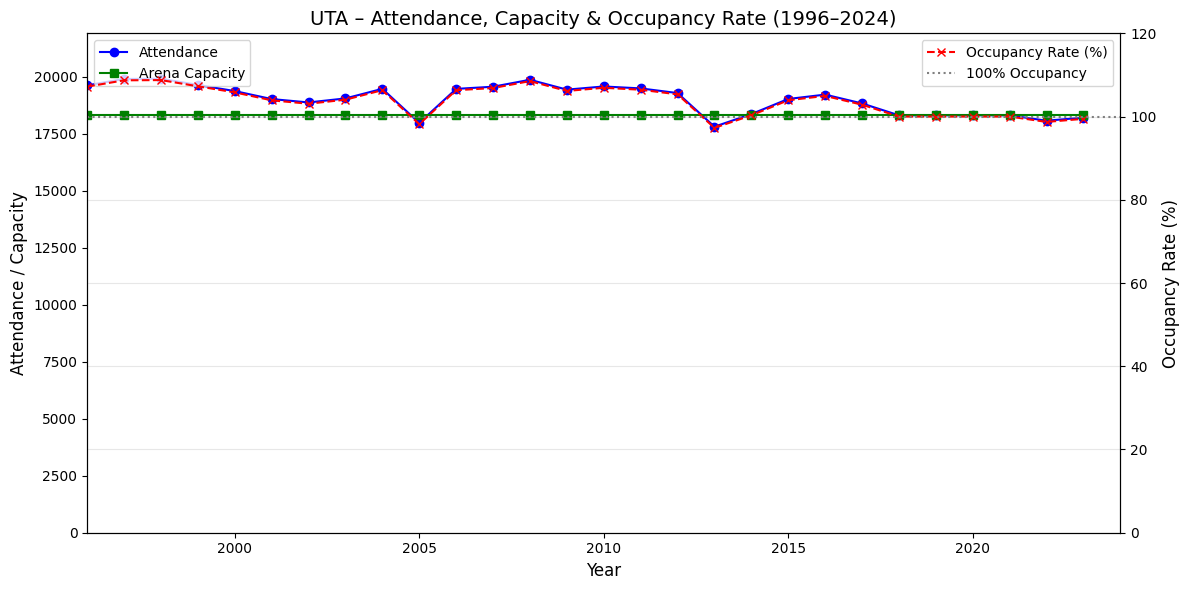

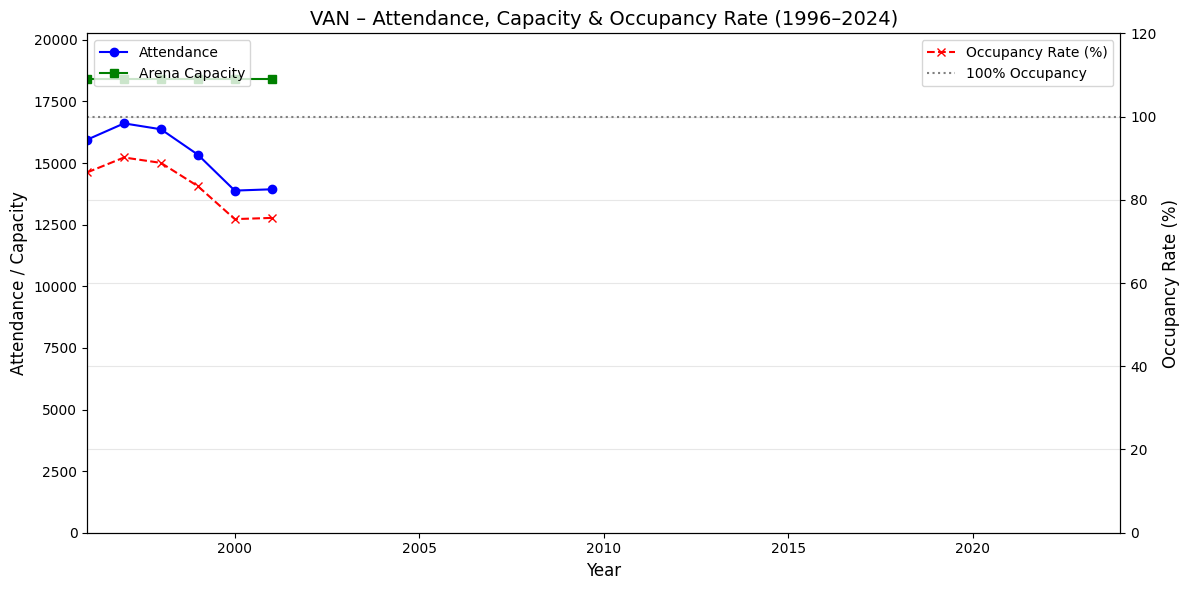

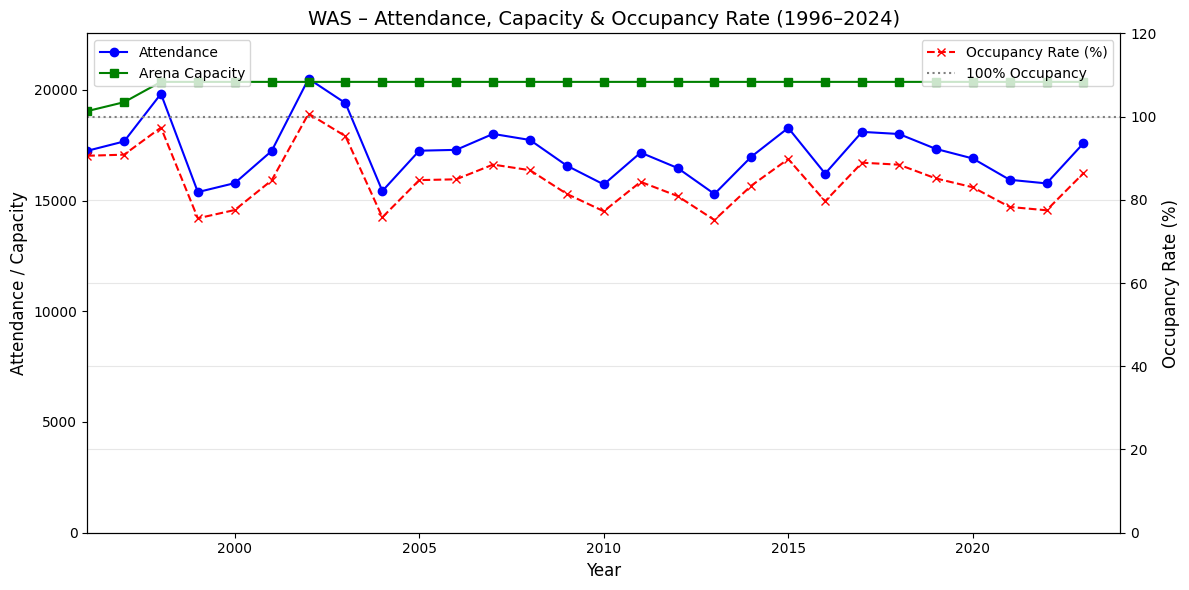

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("Master_Short_Data.csv")

# Datum konvertieren
df['game_date'] = pd.to_datetime(df['game_date'])
df = df[df['game_date'].dt.year >= 1996]

# Jahr extrahieren
df['year'] = df['game_date'].dt.year

# Occupancy Rate berechnen
df['occupancy_rate'] = df['attendance'] / df['arena_capacity']

# Gruppierung Team & Jahr
team_year_data = df.groupby(['team_abbreviation_home', 'year']).agg({
    'attendance': 'mean',
    'arena_capacity': 'mean',
    'occupancy_rate': 'mean'
}).reset_index()

# Nur Teams mit gültigem arena_capacity
valid_teams = team_year_data.groupby('team_abbreviation_home')['arena_capacity'].apply(lambda x: x.notna().any())
valid_teams = valid_teams[valid_teams].index.tolist()

# Feste Jahresliste
all_years = pd.DataFrame({'year': list(range(1996, 2025))})

# Plot pro Team
for team in sorted(valid_teams):
    team_data = team_year_data[team_year_data['team_abbreviation_home'] == team]

    # Auffüllen fehlender Jahre
    team_data = pd.merge(all_years, team_data, on='year', how='left')

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Attendance & Capacity (linke Achse)
    ax1.plot(team_data['year'], team_data['attendance'], label='Attendance', color='blue', marker='o')
    ax1.plot(team_data['year'], team_data['arena_capacity'], label='Arena Capacity', color='green', marker='s')
    ax1.set_ylabel('Attendance / Capacity', fontsize=12)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylim(0, team_data[['attendance', 'arena_capacity']].max().max() * 1.1)
    ax1.set_xlim(1996, 2024)

    # Occupancy Rate (rechte Achse)
    ax2 = ax1.twinx()
    ax2.plot(team_data['year'], team_data['occupancy_rate'] * 100, label='Occupancy Rate (%)', color='red', linestyle='--', marker='x')
    ax2.axhline(y=100, color='gray', linestyle=':', linewidth=1.5, label='100% Occupancy')
    ax2.set_ylabel('Occupancy Rate (%)', fontsize=12)
    ax2.set_ylim(0, 120)

    # Titel & Legenden
    plt.title(f'{team} – Attendance, Capacity & Occupancy Rate (1996–2024)', fontsize=14)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


### Anylzing Categorical Variables: Bar Charts

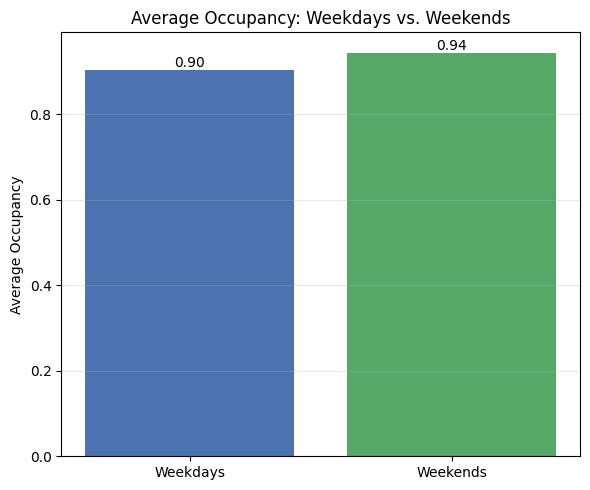

Difference in average Occupancy between weekdays and weekends: 0.04136243087400171


In [69]:
import matplotlib.pyplot as plt

# Ensure weekday_name exists
if 'weekday_name' not in df.columns:
    df['weekday_name'] = df['game_date'].dt.day_name()

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
weekends = ['Friday', 'Saturday', 'Sunday']

# Calculate average attendance
attendance_weekdays = df[df['weekday_name'].isin(weekdays)]['occupancy_rate'].mean()
attendance_weekends = df[df['weekday_name'].isin(weekends)]['occupancy_rate'].mean()

# Prepare data for bar chart
labels = ['Weekdays', 'Weekends']
values = [attendance_weekdays, attendance_weekends]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['#4C72B0', '#55A868'])

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        height,                              # Y position
        f"{height:.2f}",                     # Text (2 decimal places)
        ha='center', va='bottom', fontsize=10
    )

plt.ylabel('Average Occupancy')
plt.title('Average Occupancy: Weekdays vs. Weekends')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference in average Occupancy between weekdays and weekends:",
      attendance_weekends - attendance_weekdays)


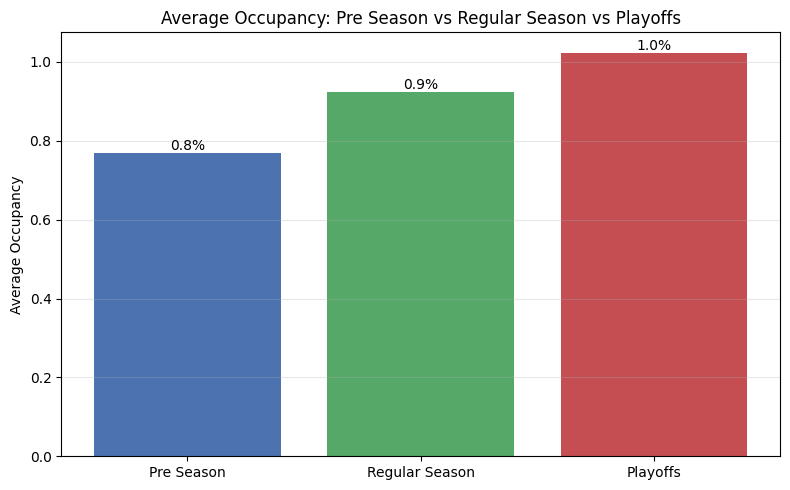

Difference in average Occupancy between playoffs and regular season: 0.10074356306607113
Difference in average Occupancy between playoffs and Pre Season: 0.2540985778827617
Difference in average Occupancy between Regular Season and Pre Season: 0.15335501481669056


In [70]:
import matplotlib.pyplot as plt

# Ensure 'season_type' and 'attendance' columns exist
season_types = ['Pre Season', 'Regular Season', 'Playoffs']
attendance_by_type = (
    df[df['season_type'].isin(season_types)]
    .groupby('season_type')['occupancy_rate']
    .mean()
    .reindex(season_types)
)

plt.figure(figsize=(8, 5))
bars = plt.bar(
    attendance_by_type.index,
    attendance_by_type.values,
    color=['#4C72B0', '#55A868', '#C44E52']
)

# Add value labels above bars (as percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",  # convert to percentage with 1 decimal
        ha='center', va='bottom',
        fontsize=10
    )

plt.ylabel('Average Occupancy')
plt.title('Average Occupancy: Pre Season vs Regular Season vs Playoffs')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference in average Occupancy between playoffs and regular season:",
      attendance_by_type["Playoffs"] - attendance_by_type["Regular Season"])
print("Difference in average Occupancy between playoffs and Pre Season:",
      attendance_by_type["Playoffs"] - attendance_by_type["Pre Season"])
print("Difference in average Occupancy between Regular Season and Pre Season:",
      attendance_by_type["Regular Season"] - attendance_by_type["Pre Season"])


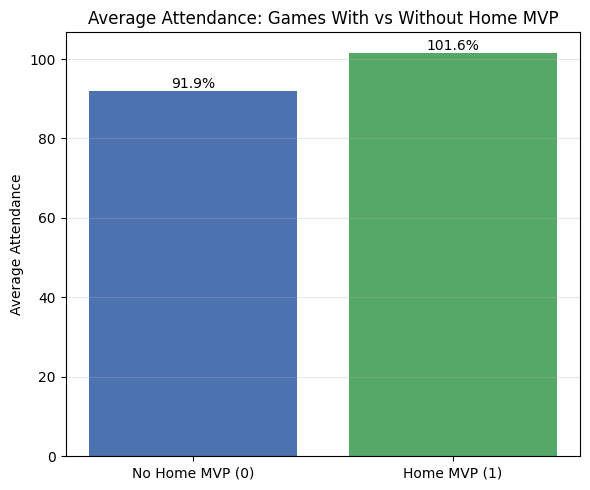

Difference in average Occupancy between having a MVP and not having one: 9.727330533751797


In [71]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Master_Short_Data.csv')

# Calculate average attendance for games with and without a home MVP
attendance_by_home_mvp = df.groupby('home_mvp')['occupancy_rate'].mean()

# Prepare labels
labels = ['No Home MVP (0)', 'Home MVP (1)']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, attendance_by_home_mvp.values, color=['#4C72B0', '#55A868'])

# Add value labels above bars (as percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",  # percentage with 1 decimal
        ha='center', va='bottom',
        fontsize=10
    )

plt.ylabel('Average Attendance')
plt.title('Average Attendance: Games With vs Without Home MVP')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference in average Occupancy between having a MVP and not having one:",
      attendance_by_home_mvp[1] - attendance_by_home_mvp[0])


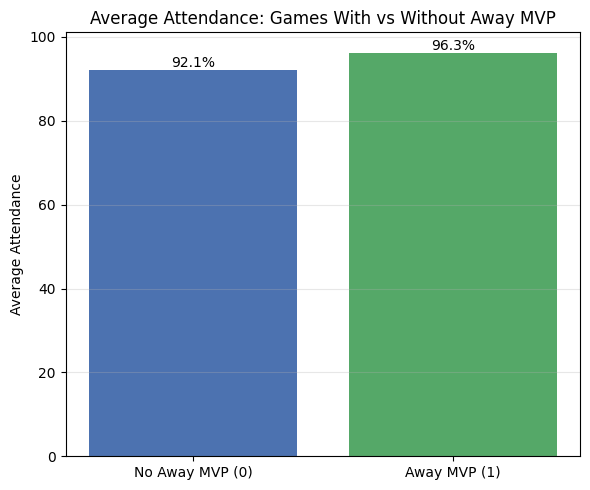

Difference in average Occupancy between having an away MVP and not having one: 4.165438764142493


In [72]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Master_Short_Data.csv')

# Calculate average attendance for games with and without an away MVP
attendance_by_away_mvp = df.groupby('away_mvp')['occupancy_rate'].mean()

# Prepare labels
labels = ['No Away MVP (0)', 'Away MVP (1)']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, attendance_by_away_mvp.values, color=['#4C72B0', '#55A868'])

# Add value labels above bars (as percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",  # percentage with 1 decimal place
        ha='center', va='bottom',
        fontsize=10
    )

plt.ylabel('Average Attendance')
plt.title('Average Attendance: Games With vs Without Away MVP')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference in average Occupancy between having an away MVP and not having one:",
      attendance_by_away_mvp[1] - attendance_by_away_mvp[0])


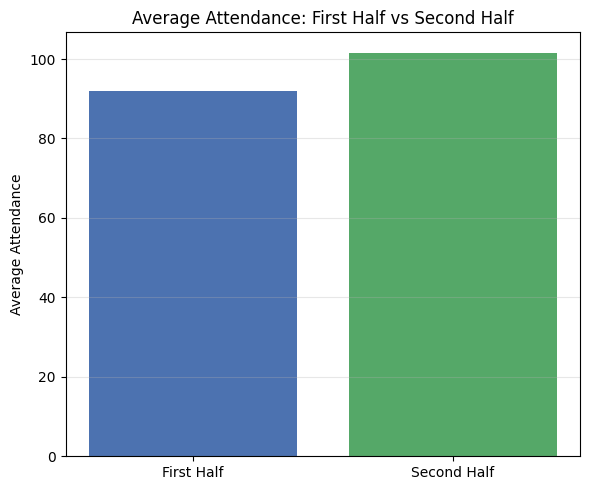

Difference in average attendance between first and second half (second half includes playoffs) 9.727330533751797


In [73]:
import matplotlib.pyplot as plt

# Calculate average attendance for games with and without a home MVP
attendance_by_season_half = df.groupby('season_half')['attendance'].mean()

# Prepare labels
labels = ['First Half', 'Second Half']

plt.figure(figsize=(6, 5))
plt.bar(labels, attendance_by_home_mvp.values, color=['#4C72B0', '#55A868'])
plt.ylabel('Average Attendance')
plt.title('Average Attendance: First Half vs Second Half')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("Difference in average attendance between first and second half (second half includes playoffs)", attendance_by_home_mvp[1] - attendance_by_home_mvp[0])

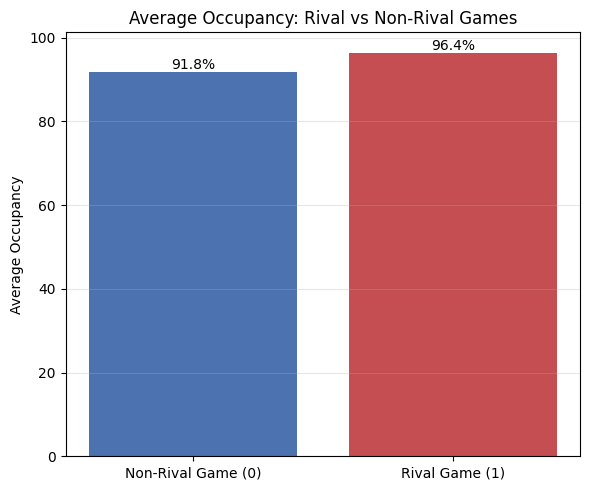

Difference in average Occupancy between a rival game and a regular game: 4.621902795092851


In [74]:
import matplotlib.pyplot as plt

# Calculate average attendance for rival and non-rival games
attendance_by_rival = df.groupby('rival_game')['occupancy_rate'].mean()

# Prepare labels
labels = ['Non-Rival Game (0)', 'Rival Game (1)']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, attendance_by_rival.values, color=['#4C72B0', '#C44E52'])

# Add value labels above bars (as percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",  # percentage with 1 decimal place
        ha='center', va='bottom',
        fontsize=10
    )

plt.ylabel('Average Occupancy')
plt.title('Average Occupancy: Rival vs Non-Rival Games')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference in average Occupancy between a rival game and a regular game:",
      attendance_by_rival[1] - attendance_by_rival[0])


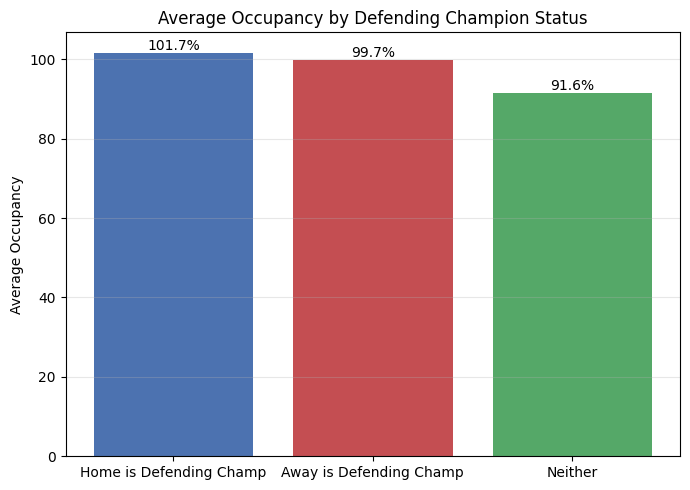

Difference (Home champ - Neither): 10.111951582259607
Difference (Away champ - Neither): 8.152877304958793


In [75]:
import matplotlib.pyplot as plt

# Calculate average attendance for each scenario
avg_home_champ = df[df['defending_champ_home'] == 1]['occupancy_rate'].mean()
avg_away_champ = df[df['defending_champ_away'] == 1]['occupancy_rate'].mean()
avg_neither = df[(df['defending_champ_home'] == 0) & (df['defending_champ_away'] == 0)]['occupancy_rate'].mean()

labels = ['Home is Defending Champ', 'Away is Defending Champ', 'Neither']
values = [avg_home_champ, avg_away_champ, avg_neither]

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, values, color=['#4C72B0', '#C44E52', '#55A868'])

# Add value labels above bars (as percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",  # percentage with 1 decimal place
        ha='center', va='bottom',
        fontsize=10
    )

plt.ylabel('Average Occupancy')
plt.title('Average Occupancy by Defending Champion Status')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Difference (Home champ - Neither):", avg_home_champ - avg_neither)
print("Difference (Away champ - Neither):", avg_away_champ - avg_neither)


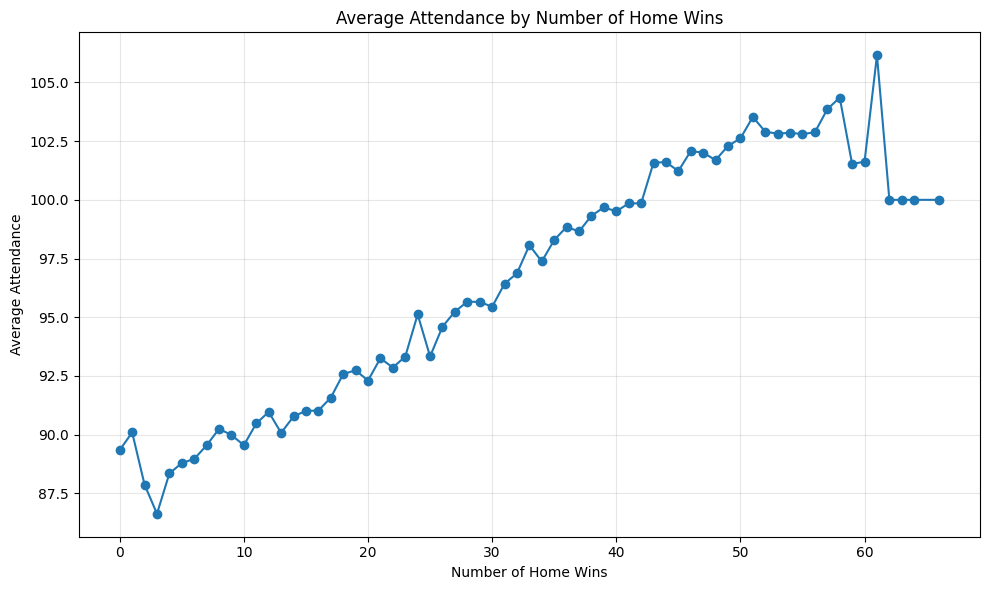

In [76]:
import matplotlib.pyplot as plt

# Calculate average attendance for each number of home wins
attendance_by_home_wins = df.groupby('home_wins')['occupancy_rate'].mean()

plt.figure(figsize=(10, 6))
plt.plot(attendance_by_home_wins.index, attendance_by_home_wins.values, marker='o')
plt.xlabel('Number of Home Wins')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Number of Home Wins')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

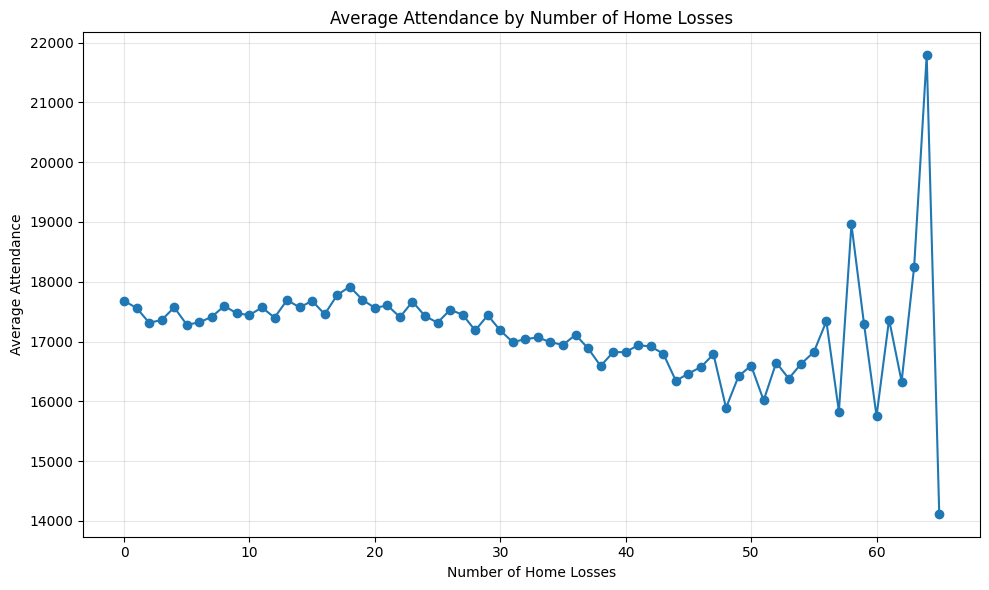

In [77]:
import matplotlib.pyplot as plt

# Calculate average attendance for each number of home losses
attendance_by_home_losses = df.groupby('home_losses')['attendance'].mean()

plt.figure(figsize=(10, 6))
plt.plot(attendance_by_home_losses.index, attendance_by_home_losses.values, marker='o')
plt.xlabel('Number of Home Losses')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Number of Home Losses')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

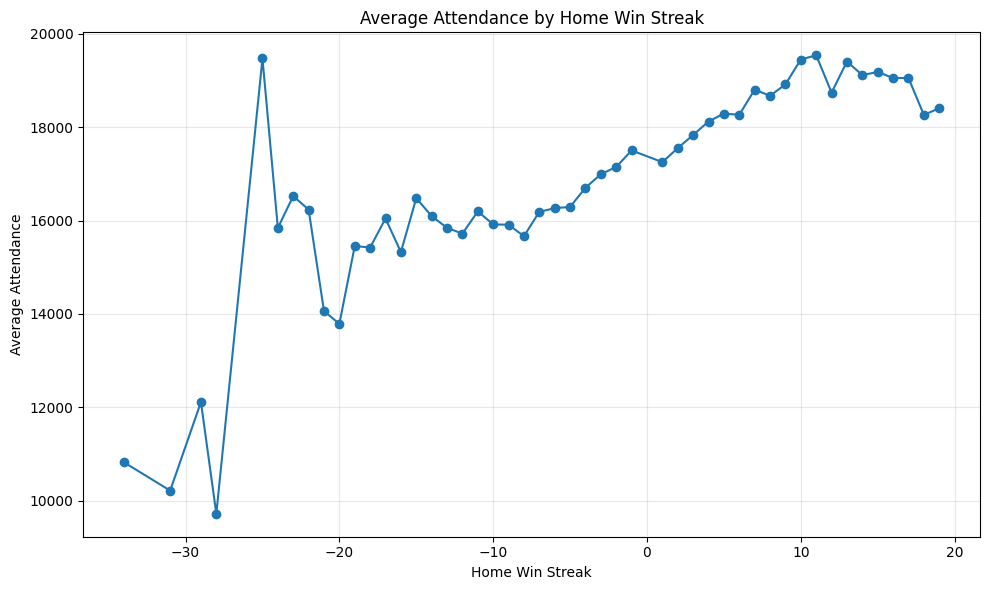

In [78]:
import matplotlib.pyplot as plt

# Calculate average attendance for each home win streak
attendance_by_home_win_streak = df.groupby('home_win_streak')['attendance'].mean().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(attendance_by_home_win_streak.index, attendance_by_home_win_streak.values, marker='o')
plt.xlabel('Home Win Streak')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Home Win Streak')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Correlation with Attendance and Occupancy Rate:

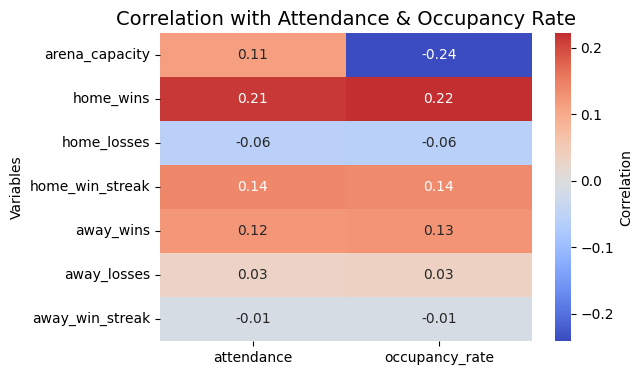

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Master_Short_Data.csv')

# Ensure date column is datetime
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year

# Relevant numeric columns
num_cols = [
    'attendance', 'occupancy_rate', 'arena_capacity',
    'home_wins', 'home_losses', 'home_win_streak',
    'away_wins', 'away_losses', 'away_win_streak'
]

# Drop NaNs
corr_data = df[num_cols].dropna()

# Calculate correlations
corr_matrix = corr_data.corr()

# Filter: only keep correlations with attendance and occupancy_rate
target_corr = corr_matrix[['attendance', 'occupancy_rate']].drop(index=['attendance', 'occupancy_rate'])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(target_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={"label": "Correlation"})
plt.title("Correlation with Attendance & Occupancy Rate", fontsize=14)
plt.ylabel("Variables")
plt.show()


## More

#### Teams that have never reached full capacity:

In [80]:
import pandas as pd

# Daten laden
df = pd.read_csv("Master_Short_Data.csv")

# Datum konvertieren
df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year

# Zeitraum 1996 - 2024 filtern
df = df[(df['year'] >= 1996) & (df['year'] <= 2024)]

# Nur gültige Capacity-Werte berücksichtigen
df = df[df['arena_capacity'].notna()]

# Prüfen, ob attendance jemals >= arena_capacity pro Team
teams = df['team_abbreviation_home'].unique()
teams_never_full = []

for team in sorted(teams):
    team_data = df[df['team_abbreviation_home'] == team]

    # Bedingung: attendance >= capacity
    if not (team_data['attendance'] >= team_data['arena_capacity']).any():
        teams_never_full.append(team)

# Ergebnis ausgeben
print("Teams, die nie ein Spiel mit voller Kapazität (attendance >= arena_capacity) hatten:")
print(teams_never_full)


Teams, die nie ein Spiel mit voller Kapazität (attendance >= arena_capacity) hatten:
[]


#### How often Teams have exceeded the full capacity

In [81]:
import pandas as pd

# Daten laden
df = pd.read_csv("Master_Short_Data.csv")

# Datum konvertieren
df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year

# Zeitraum 1996 - 2024
df = df[(df['year'] >= 1996) & (df['year'] <= 2024)]

# Nur gültige Capacity-Werte
df = df[df['arena_capacity'].notna()]

# Filter: attendance > capacity
over_capacity = df[df['attendance'] > df['arena_capacity']]

# Gruppieren und zählen
team_counts = over_capacity['team_abbreviation_home'].value_counts().sort_index()

# Ausgabe
print("Anzahl Spiele über Kapazität pro Team:")
print(team_counts)


Anzahl Spiele über Kapazität pro Team:
team_abbreviation_home
ATL    373
BKN     39
CHA    108
CHI    732
CLE    481
DAL    832
DEN    128
DET     34
GSW     60
HOU    404
IND    276
LAC    173
LAL     80
MEM      7
MIA    336
MIL    226
MIN    169
NJN     22
NOH     86
NOK     57
NOP    141
NYK      1
OKC     39
ORL    443
PHI    252
PHX    714
POR    591
SAC     49
SAS    528
SEA      3
TOR     84
UTA    684
VAN     21
WAS     85
Name: count, dtype: int64


#### How often Teams have reached exactly the Capacity

In [82]:
import pandas as pd

# Daten laden
df = pd.read_csv("Master_Short_Data.csv")

# Datum konvertieren
df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year

# Zeitraum 1996 bis 2024
df = df[(df['year'] >= 1996) & (df['year'] <= 2024)]

# Nur gültige arena_capacity Werte berücksichtigen
df = df[df['arena_capacity'].notna()]

# Filter: attendance == arena_capacity
exact_capacity = df[df['attendance'] == df['arena_capacity']]

# Gruppieren und zählen
team_exact_counts = exact_capacity['team_abbreviation_home'].value_counts().sort_index()

# Ausgabe
print("Anzahl Spiele mit exakt voller Kapazität pro Team:")
print(team_exact_counts)


Anzahl Spiele mit exakt voller Kapazität pro Team:
team_abbreviation_home
BKN    116
BOS    118
CHA      4
CHH     60
CLE     97
DAL      4
DEN     53
DET    338
GSW    450
HOU    136
IND     45
LAC     71
LAL    769
MEM    103
MIA    345
MIL     59
NJN     46
NOP      1
NYK    239
OKC    391
ORL     93
POR     59
SAC    441
SAS    110
TOR    432
UTA    131
WAS     54
Name: count, dtype: int64


#### Correlation Matrix

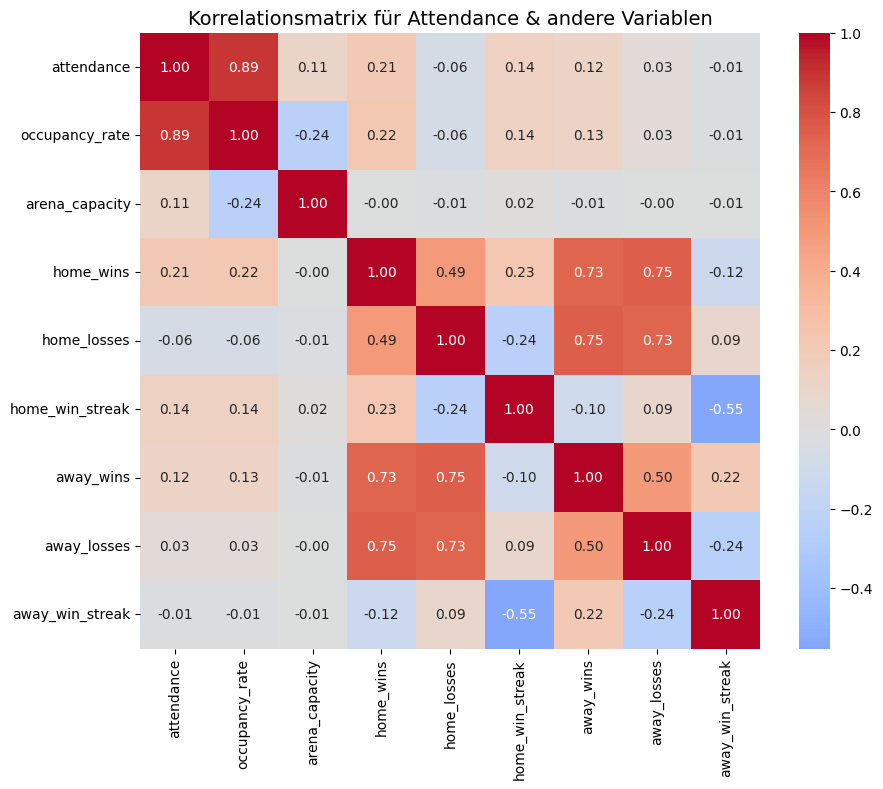

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv('Master_Short_Data.csv')

# Datum & Jahr anpassen, falls nötig
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year

# Relevante numerische Spalten extrahieren
num_cols = [
    'attendance', 'occupancy_rate', 'arena_capacity',
    'home_wins', 'home_losses', 'home_win_streak',
    'away_wins', 'away_losses', 'away_win_streak'
]

# Nur numerische Daten nehmen & NaNs entfernen
corr_data = df[num_cols].dropna()

# Korrelationsmatrix
corr_matrix = corr_data.corr()

# Heatmap plotten
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix für Attendance & andere Variablen", fontsize=14)
plt.show()
